# Learning Plan

### Lesson 3-1: Introduction to Policy-Based Methods
In this lesson, you will learn about methods such as hill climbing, simulated annealing, and adaptive noise scaling. You'll also learn about cross-entropy methods and evolution strategies.

### Lesson 3-2: : Policy Gradient Methods
In this lesson, you'll study REINFORCE, along with improvements we can make to lower the variance of policy gradient algorithms.

### Lesson 3-3: : Proximal Policy Optimization
In this lesson, you'll learn about Proximal Policy Optimization (PPO), a cutting-edge policy gradient method.

### Lesson 3-4: : Actor-Critic Methods
In this lesson, you'll learn how to combine value-based and policy-based methods, bringing together the best of both worlds, to solve challenging reinforcement learning problems.

### Lesson 3-5: : Deep RL for Finance (Optional)
In this optional lesson, you'll learn how to apply deep reinforcement learning techniques for optimal execution of portfolio transactions.

## Optional Resorces

* Read the most famous [blog post] {http://karpathy.github.io/2016/05/31/rl/} on policy gradient methods.
* Implement a policy gradient method to win at Pong in this [Medium post] {https://medium.com/@dhruvp/how-to-write-a-neural-network-to-play-pong-from-scratch-956b57d4f6e0}.
* Learn more about [evolution strategies] {https://blog.openai.com/evolution-strategies/} from OpenAI.

# Lesson 3-1: Introduction to Policy-Based Methods

## 3-1-1 : Policy-Based Methods

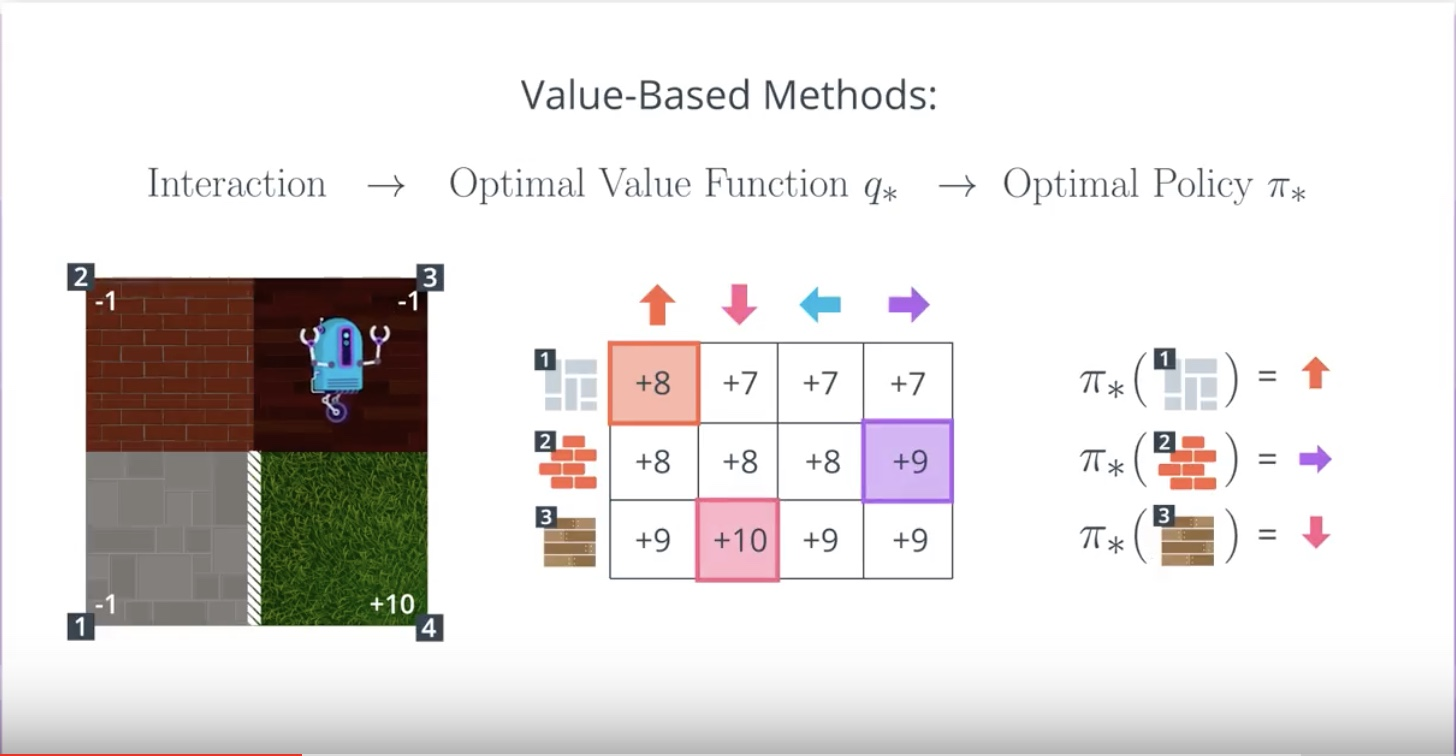

In [2]:
from IPython.display import Image
Image(filename='./images/3-1-1-1_value_based_methods_with_discrete_state.jpeg')

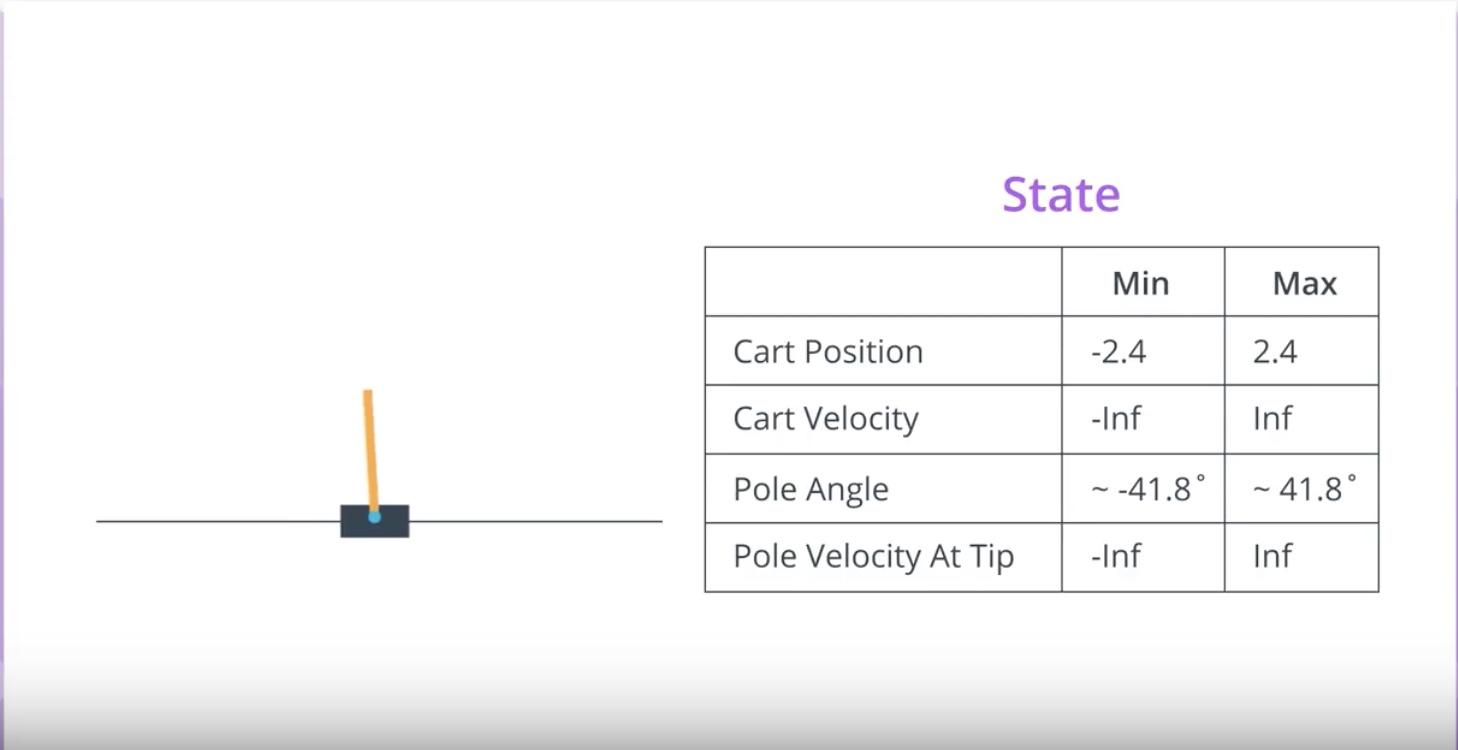

In [3]:
from IPython.display import Image
Image(filename='./images/3-1-1-2_value_based_methods_with_continuous_state.jpeg')

### It's impossible to represnet the optimal action value fruction in a table.
### Because we need to a row from the table and that would make the table too big to be useful in practice.

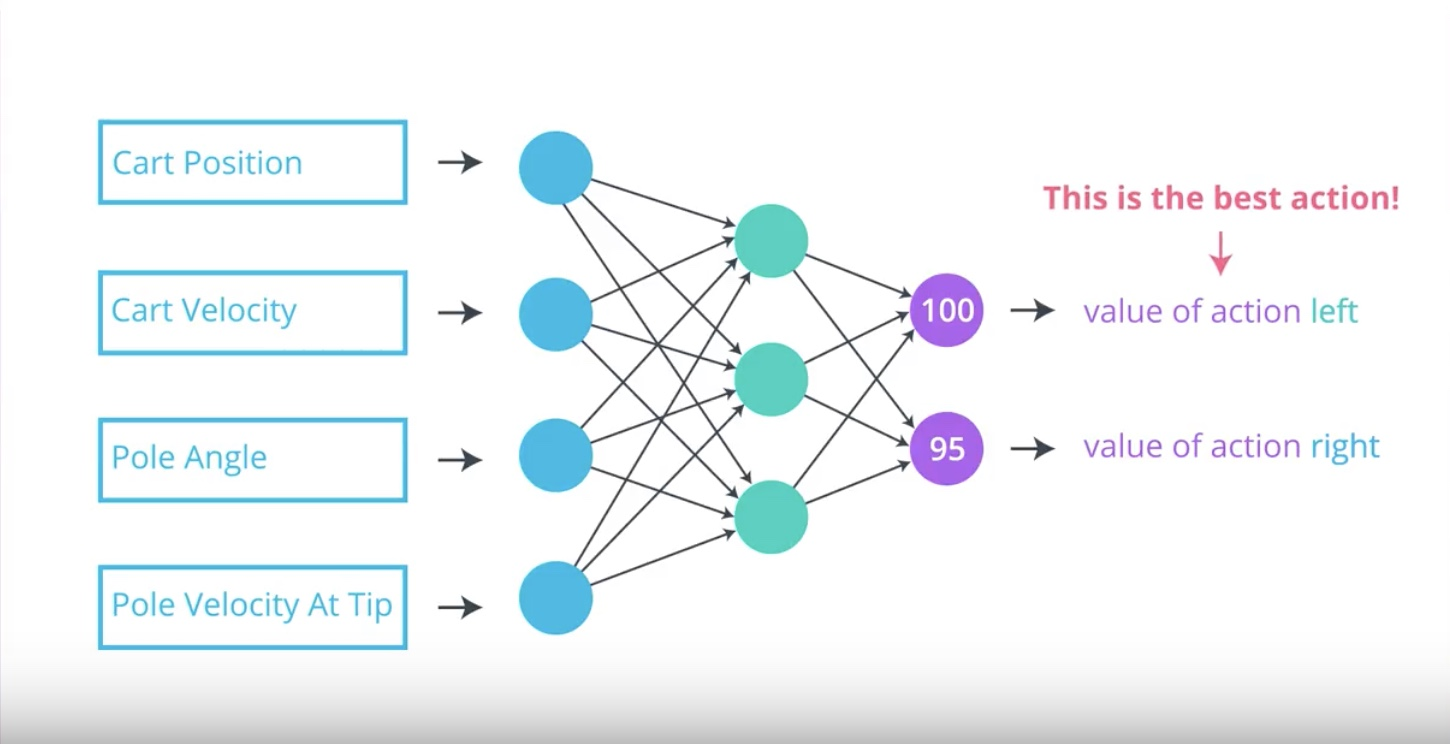

In [4]:
from IPython.display import Image
Image(filename='./images/3-1-1-3_value_based_methods_with_continuous_state_using_Deep_Q_Learning.jpeg')

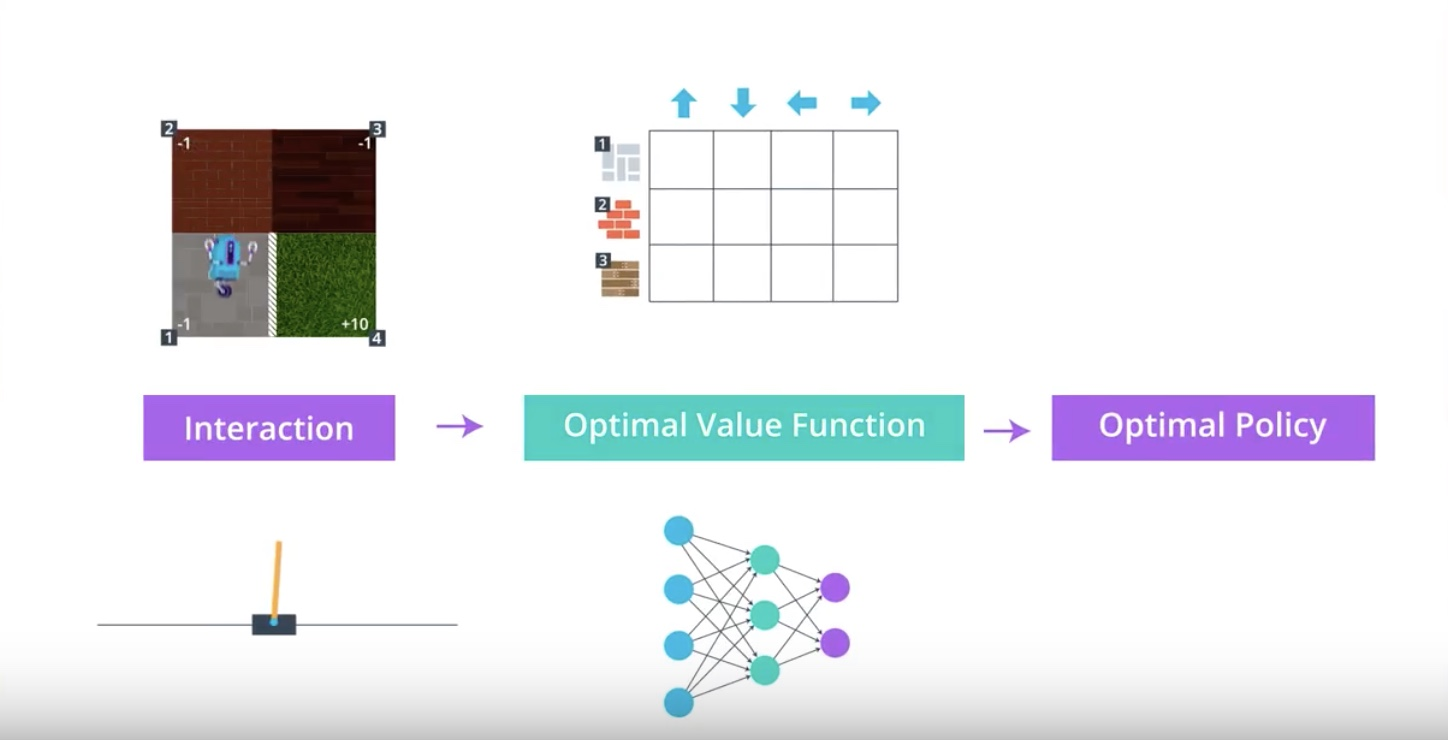

In [6]:
from IPython.display import Image
Image(filename='./images/3-1-1-4_value_based_methods_estimate_optimal_value_function_first_before_optimal_policy.jpeg')

### Important message is that...
### in both cases, whether we used a table for small state spaces or a neural network for much larger state spaces,
## We had to first estimate the 'Optimal Action Value Fuction' 
## before we could make the 'Optimal Policy'

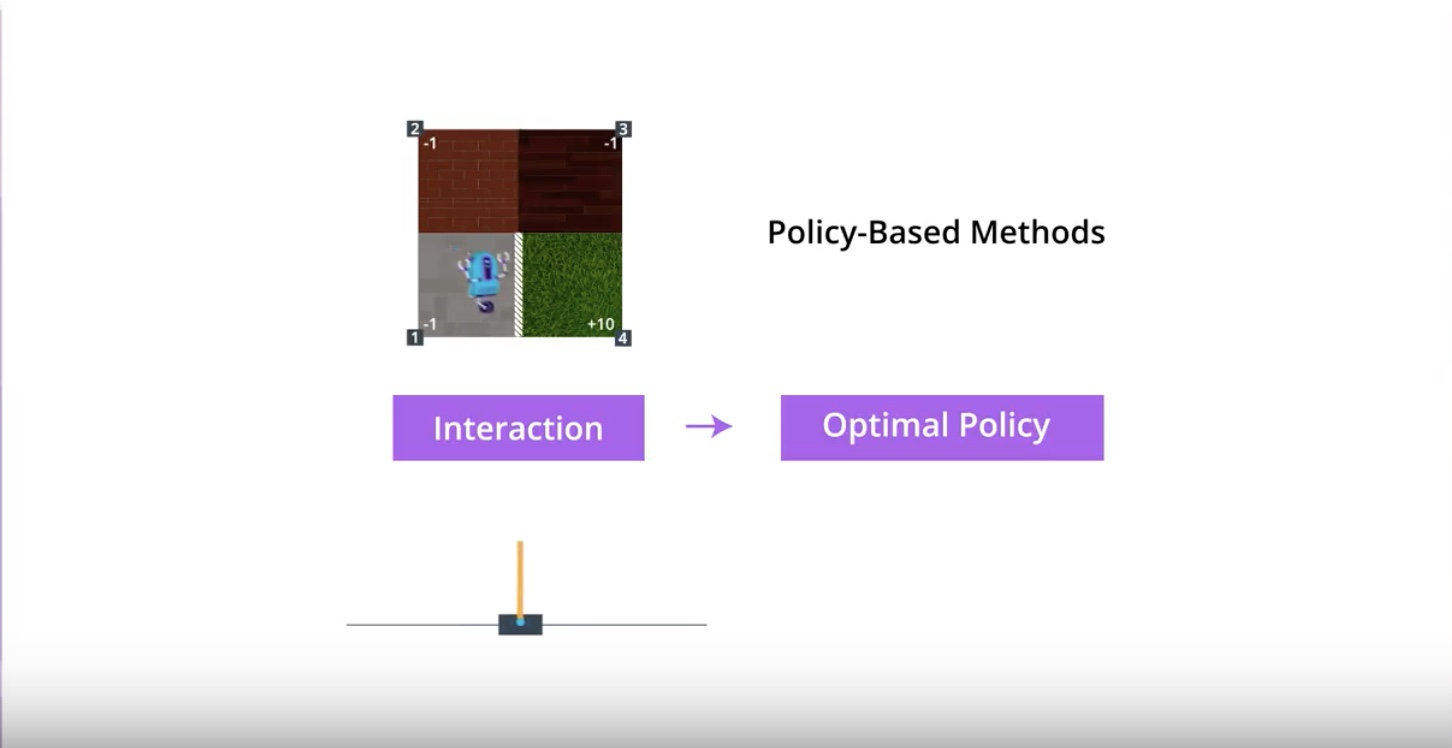

In [7]:
from IPython.display import Image
Image(filename='./images/3-1-1-5_policy_based_methods.jpeg')

### Key concept about 'Policy-based Methods' is...
## We can directly find the 'Optimal Policy' without worrying about a value fuction at all.

## 3-1-2 : Policy Function Approximation

### How might we use a neural network to approximate a policy?

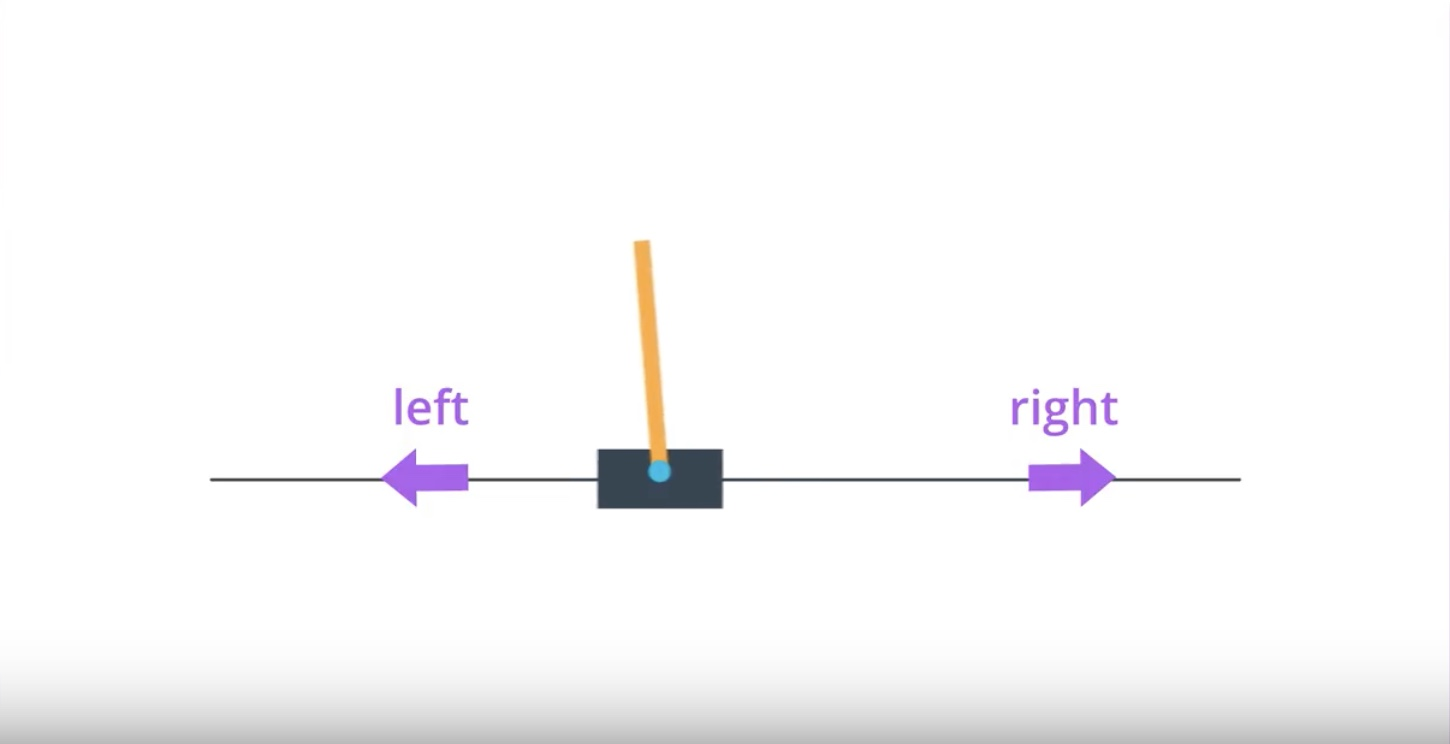

In [8]:
from IPython.display import Image
Image(filename='./images/3-1-2-1_policy_function_approximation_cartpole_has_two_actions.jpeg')

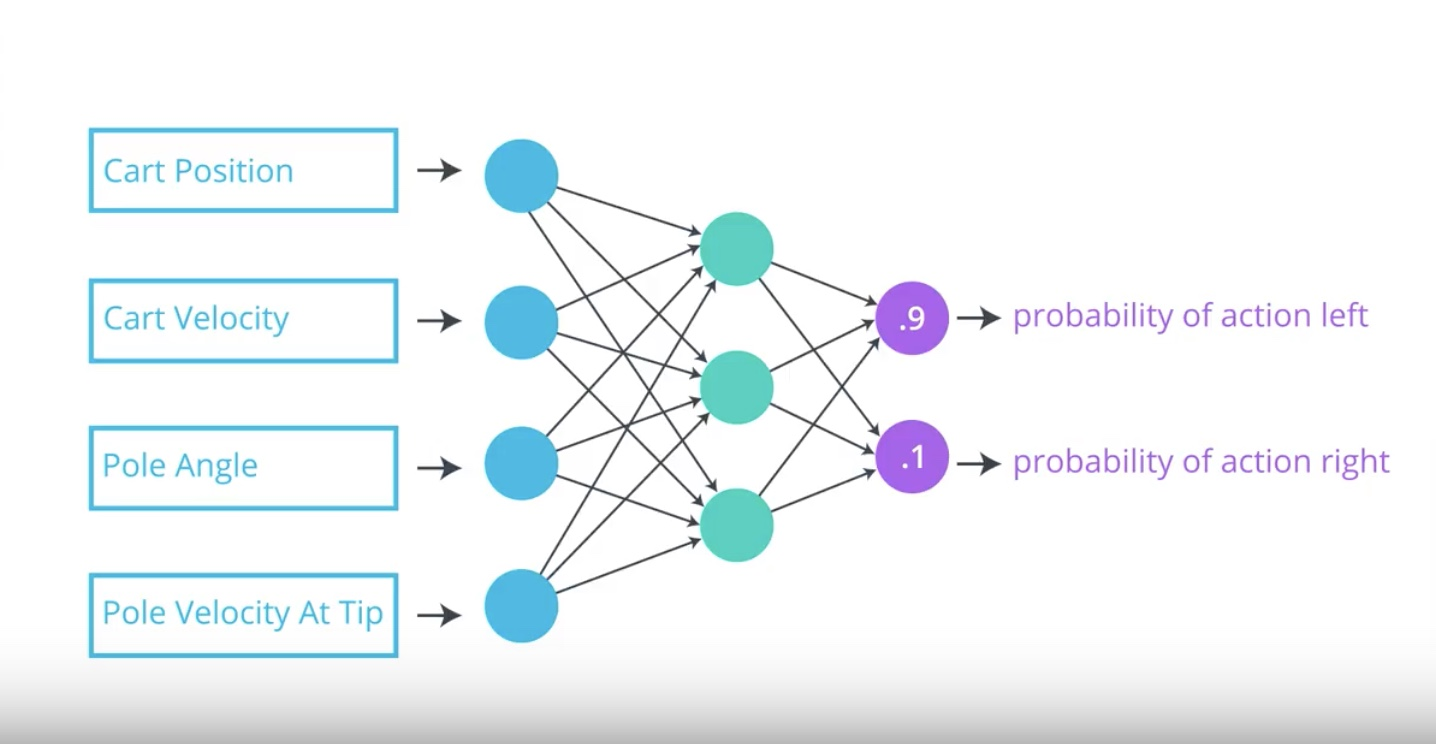

In [10]:
from IPython.display import Image
Image(filename='./images/3-1-2-2_policy_function_approximation_neural_newtwork_return_posibilities.jpeg')

### Our objective is to determine appropriate values for the network weights so that for each state that we pass into the network.
## Neural Network returns action probabilities where the optimal action is most likely to be selected.
### This will help the agent with its goal to maximize expected return.

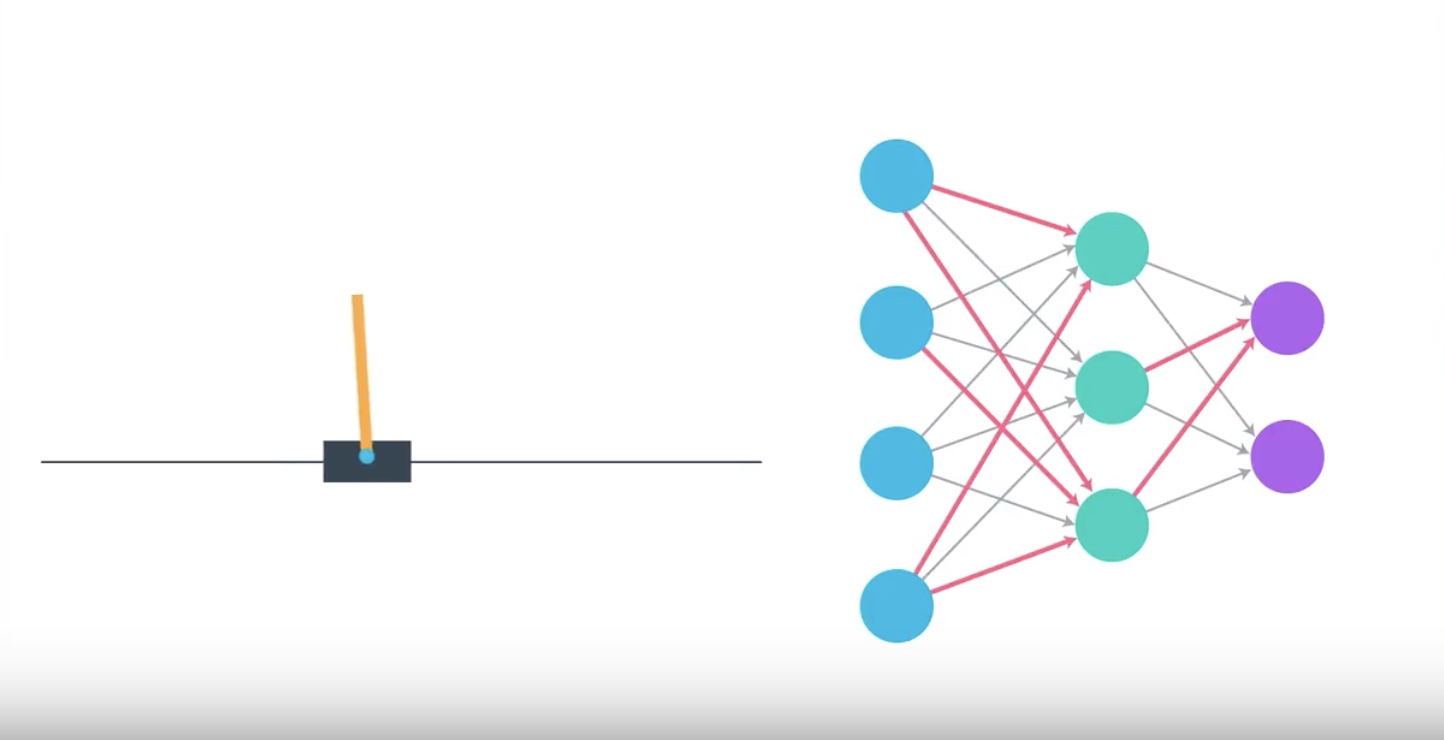

In [12]:
from IPython.display import Image
Image(filename='./images/3-1-2-3_policy_function_approximation_agent_learns_how_to_maximize_reword_interactively.jpeg')

### 1. Weights are initially set to random values.
### 2. The agent interacts with the environment
### 3. The agnet learns more about what strategies are best for maximizing reward.
## This process amends those wheights and the agent starts to choose the appropriate action for each state and gradually masters the Cartpole task.

## 3-1-3 : More on the Policy

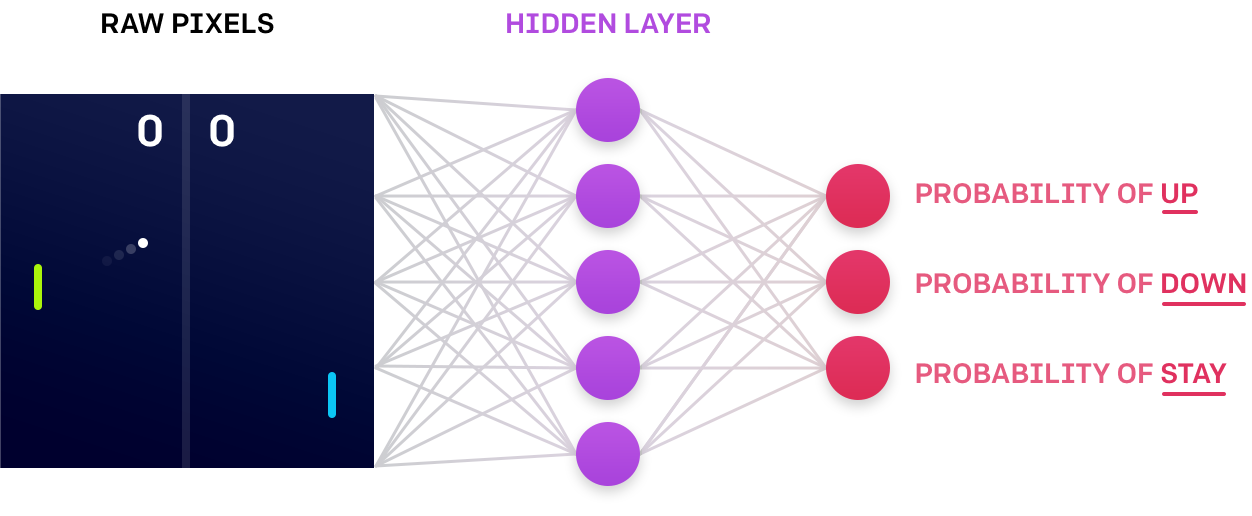

In [13]:
from IPython.display import Image
Image(filename='./images/3-1-3-1_neural_network_encodes_action_probabilities.png')

[ref] {https://blog.openai.com/evolution-strategies/}

### Neural Network approximates [Stochastic Policy]
- Above image, a simple neural network architecture to approximate a stochastic policy.
    1. The agent passes the current environment state as input to the network.
    2. The neural network returns 'action probabilities'.
    3. The agent samples from those probabilities to select an action.

### Neural Network approximates [Deterministic Policy]
- Instead of sampling from the action probabilites, the agent need only choose the greedy action.

## Quiz
### Question : you learned that the neural network that approximates the policy takes the environment state as input. The output layer returns the probability that the agent should select each possible action. Which of the following is a valid activation function for the output layer?

1. linear (i.e., no activation function)
2. softmax
3. ReLu

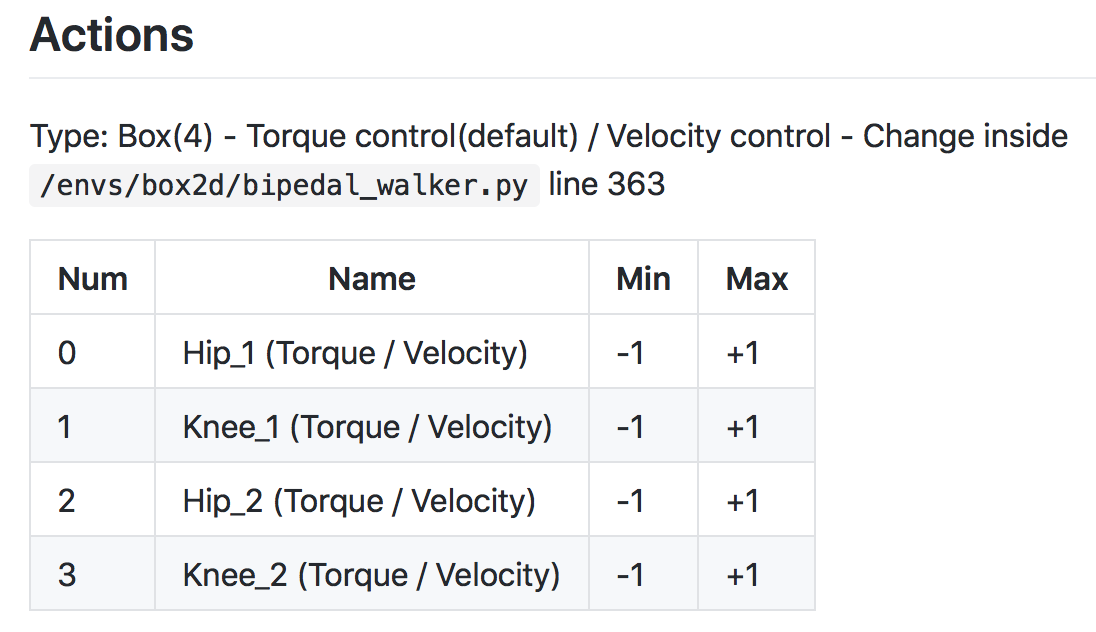

In [14]:
from IPython.display import Image
Image(filename='./images/3-1-3-2_continuous_action_space_in_bipedal_walker.png')

### Question is...
### CartPole environment has a discrete action space. So, how do we use a neural network to approximate a policy, if the environment has a continuous action space?

## * Discrete Action spaces : the neural network has one node for each possible action.
## * Continuous Action spaces : the neural network has one node for each action entry (or index).

### In the [BipedalWalker] {https://github.com/openai/gym/wiki/BipedalWalker-v2}  case
## Any action is a vector of four numbers, so the output layer of the policy network will have four nodes.

#### Since every entry in the action must be a number between -1 and 1, we will add a [tanh activation function] {https://pytorch.org/docs/stable/nn.html#torch.nn.Tanh} to the output layer

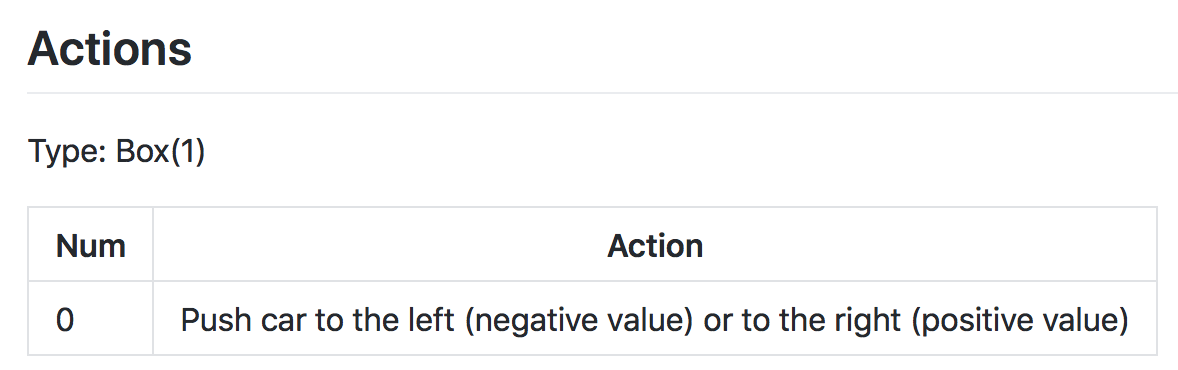

In [15]:
from IPython.display import Image
Image(filename='./images/3-1-3-3_continuous_action_space_in_mountain_car_continuous.png')

### In the [MountainCarContinuous] {https://github.com/openai/gym/wiki/MountainCarContinuous-v0}  case
## The action space is shown in the figure above. Note that for this environment, the action must be a value between -1 and 1

## Quiz
### Consider the MountainCarContinuous-v0 environment. Which of the following describes a valid output layer for the policy? (Select the option that yields valid actions that can be passed directly to the environment without any additional preprocessing.)

1. Layer size:1, Activation fuction: softmax
2. Layer size:1, Activation fuction: tanh
3. Layer size:2, Activation fuction: softmax
4. Layer size:2, Activation fuction: ReLu

## 3-1-4 : Hill Climbing Algorithm

[hill climbing] {https://en.wikipedia.org/wiki/Hill_climbing} is not just for reinforcement learning! It is a general optimization method that is used to find the maximum of a function.

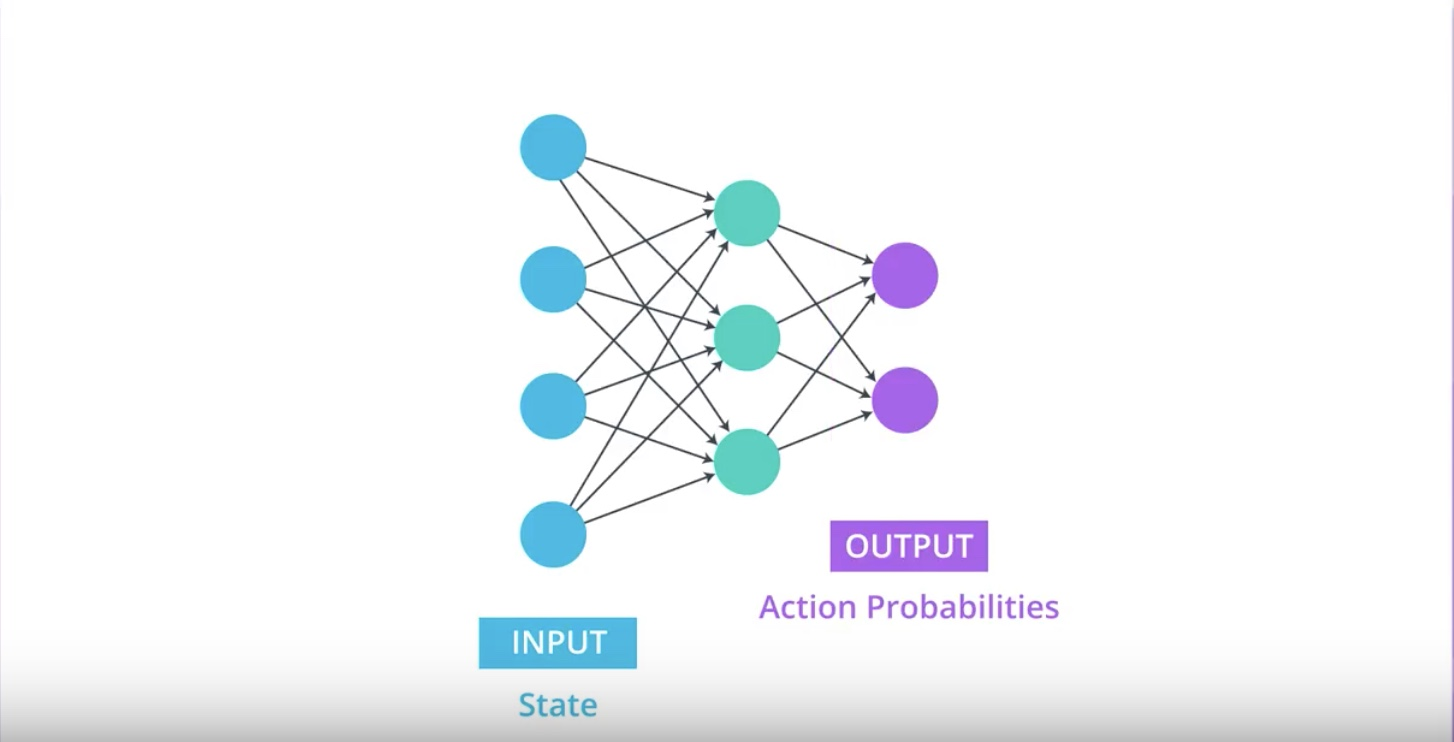

In [16]:
from IPython.display import Image
Image(filename='./images/3-1-4-1_hill_climbiing_neural_network_input_and_output.jpeg')

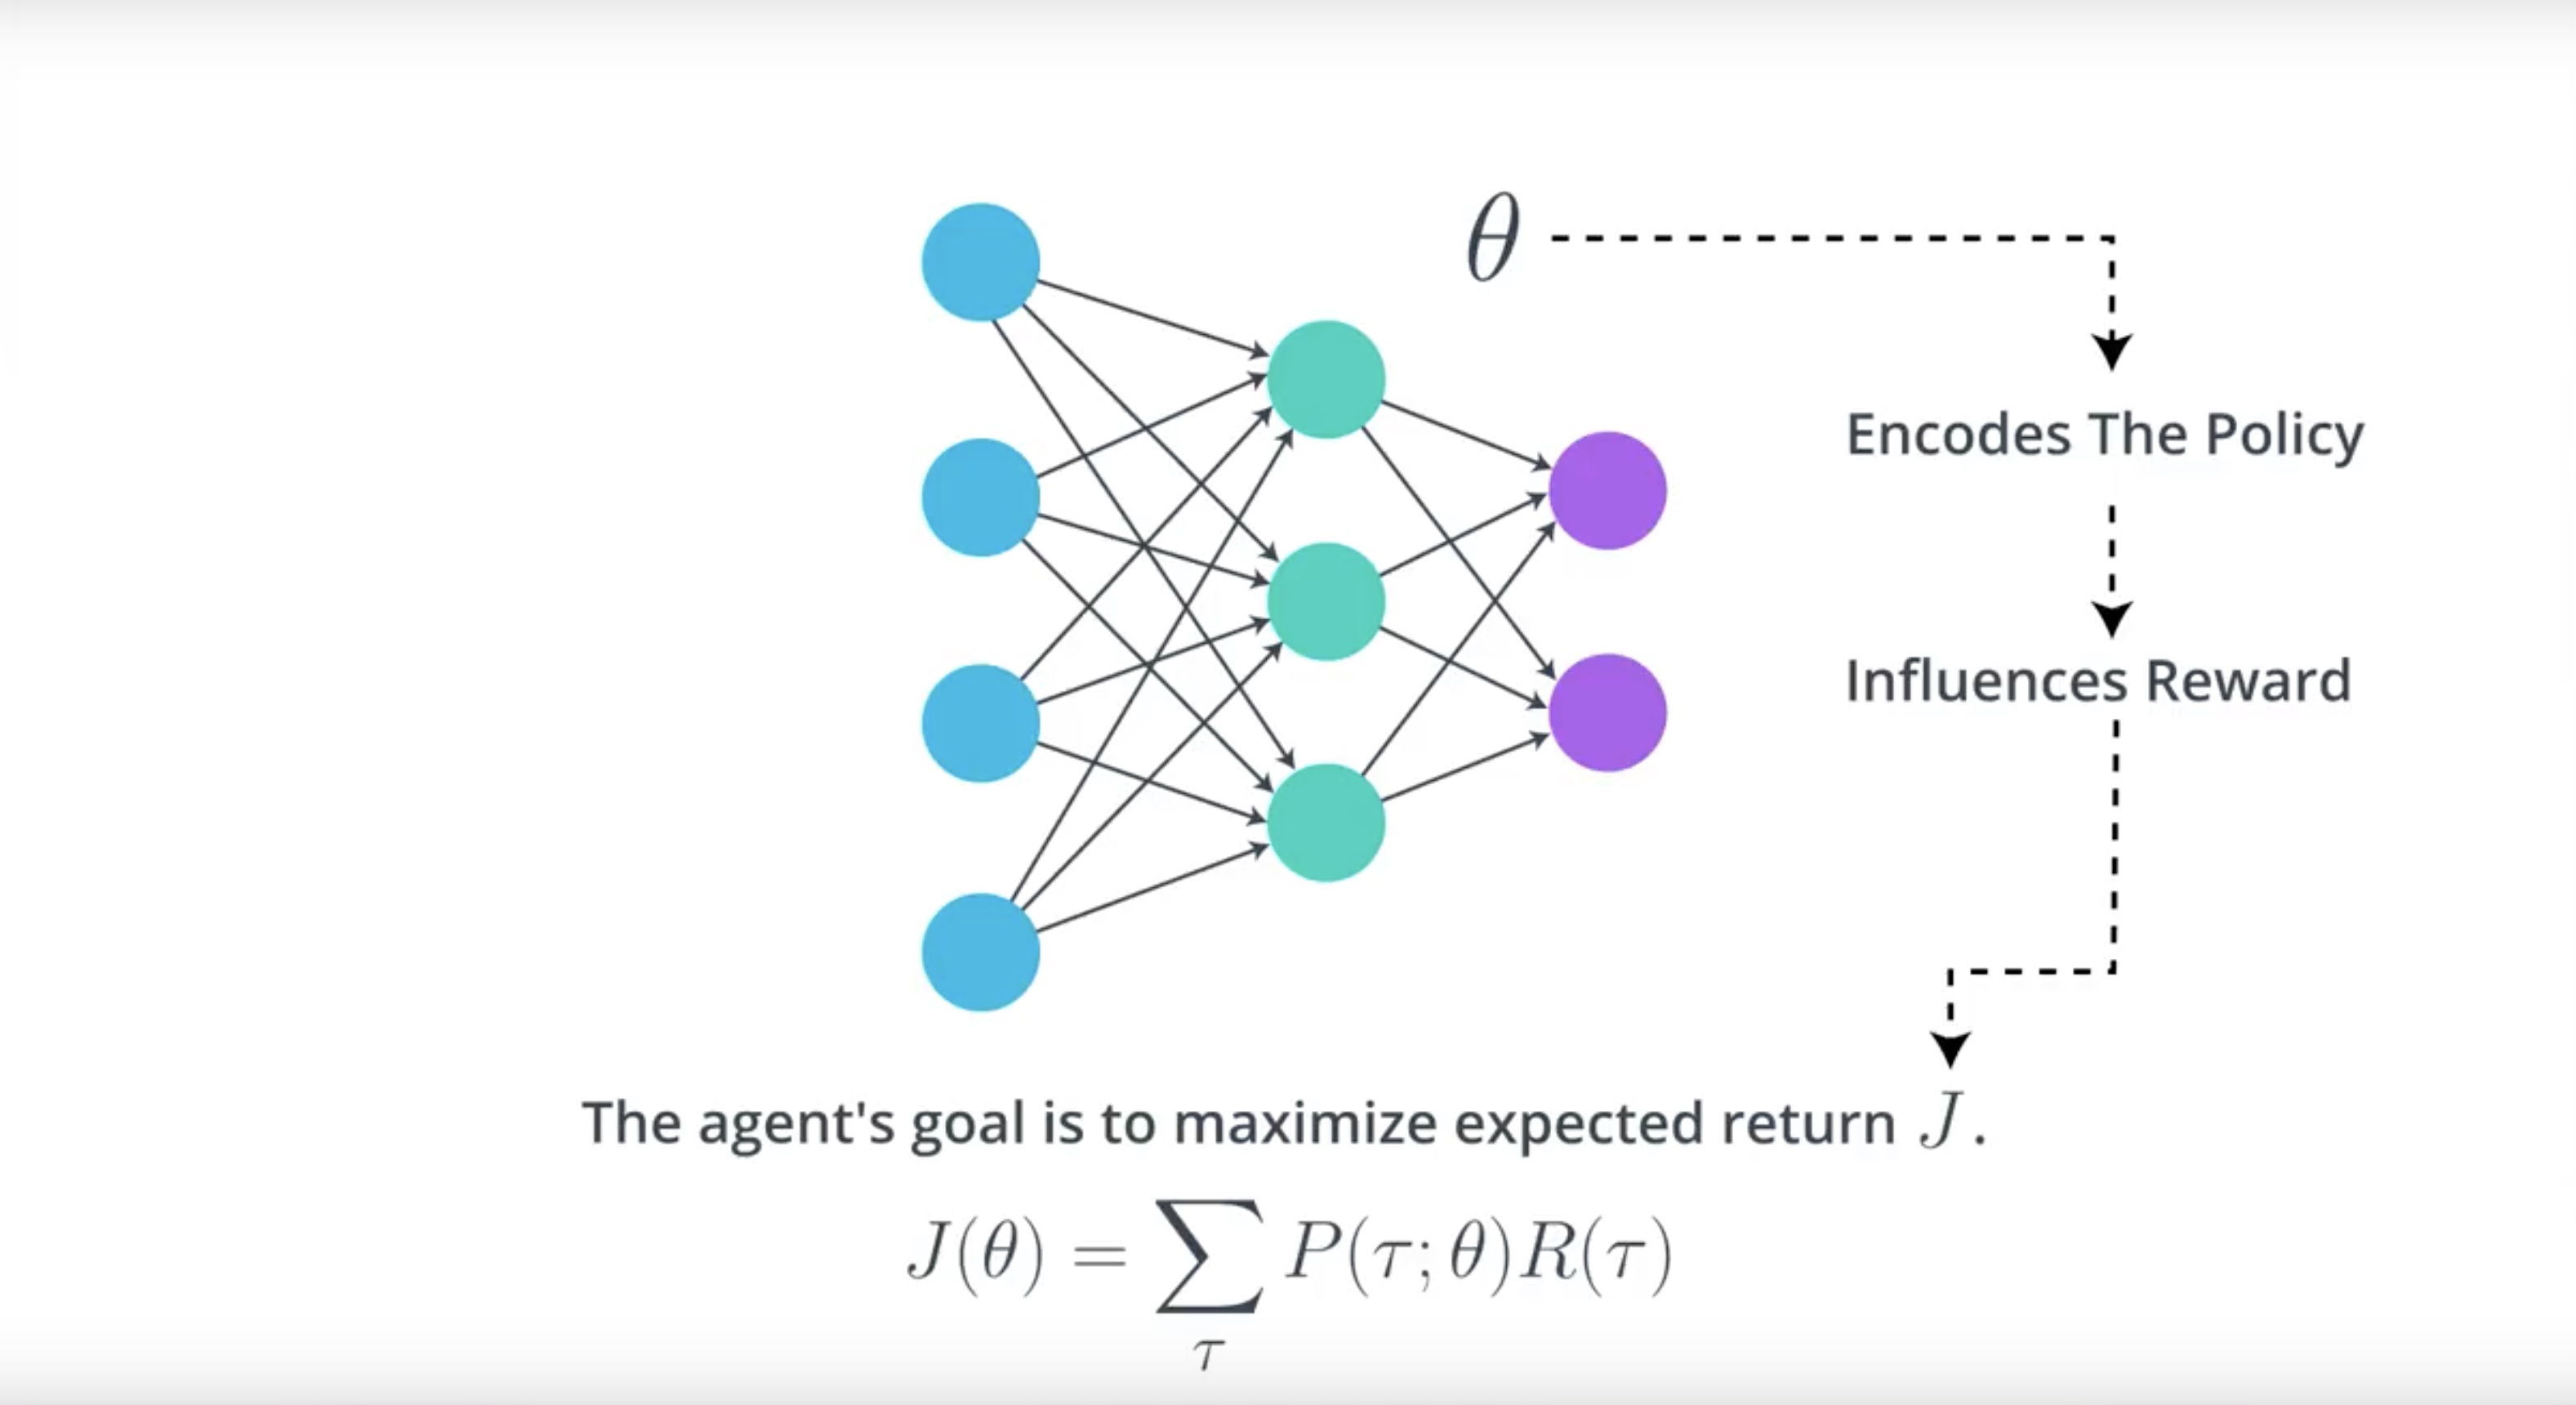

In [17]:
from IPython.display import Image
Image(filename='./images/3-1-4-2_hill_climbiing_neural_relation_between_j_theta.jpeg')

#### We'll refore to the set of weights in the neural network as Theta.
#### There's some mathematical relationship between Theta and the expected return J.
### Main idea is that it's possible to write the expected return J as a fuction of Theta.
## Our goal is to find the values for Theta.

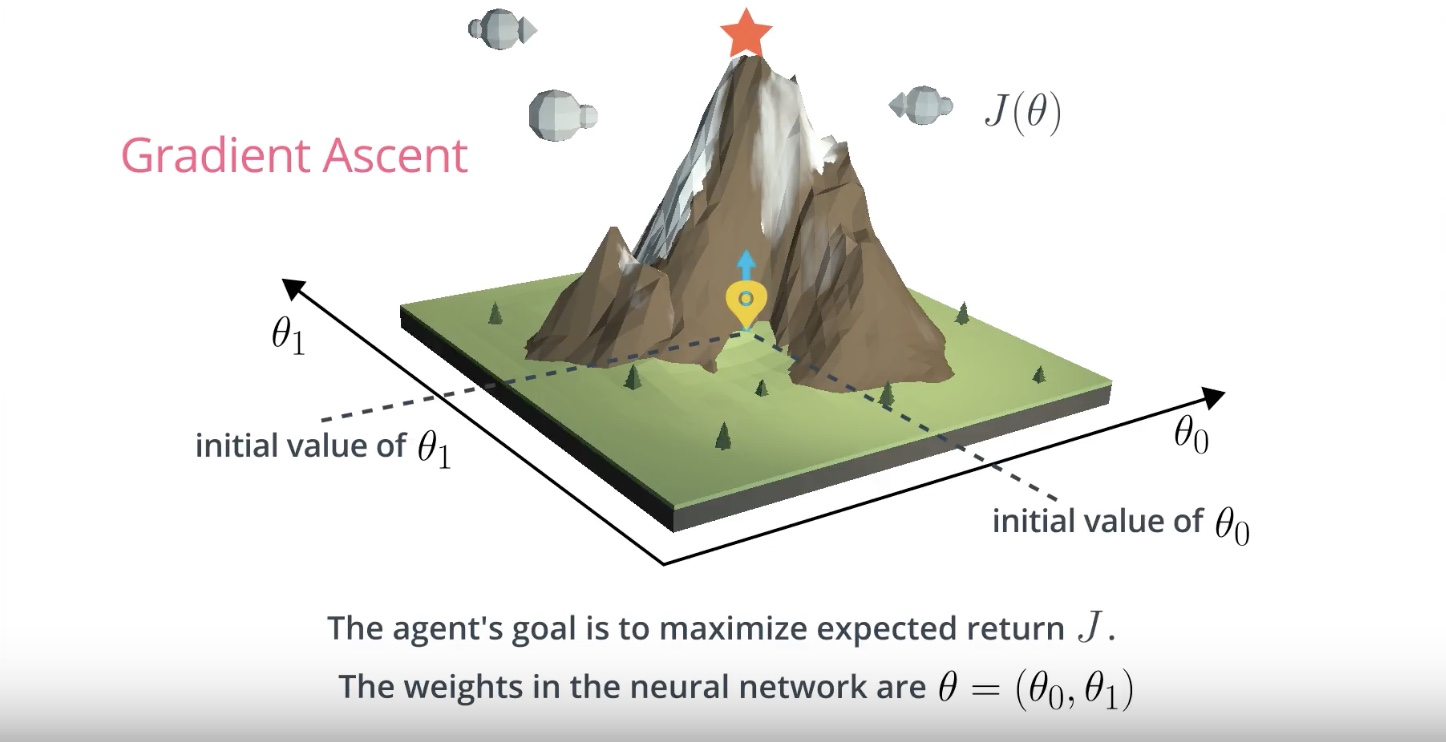

In [18]:
from IPython.display import Image
Image(filename='./images/3-1-4-3_hill_climbiing_neural_gradient_ascent.jpeg')

## Gradient Ascent

Gradient ascent is similar to gradient descent.

    * Gradient descent steps in the direction opposite the gradient, since it wants to minimize a function.
    * Gradient ascent is otherwise identical, except we step in the direction of the gradient, to reach the maximum.

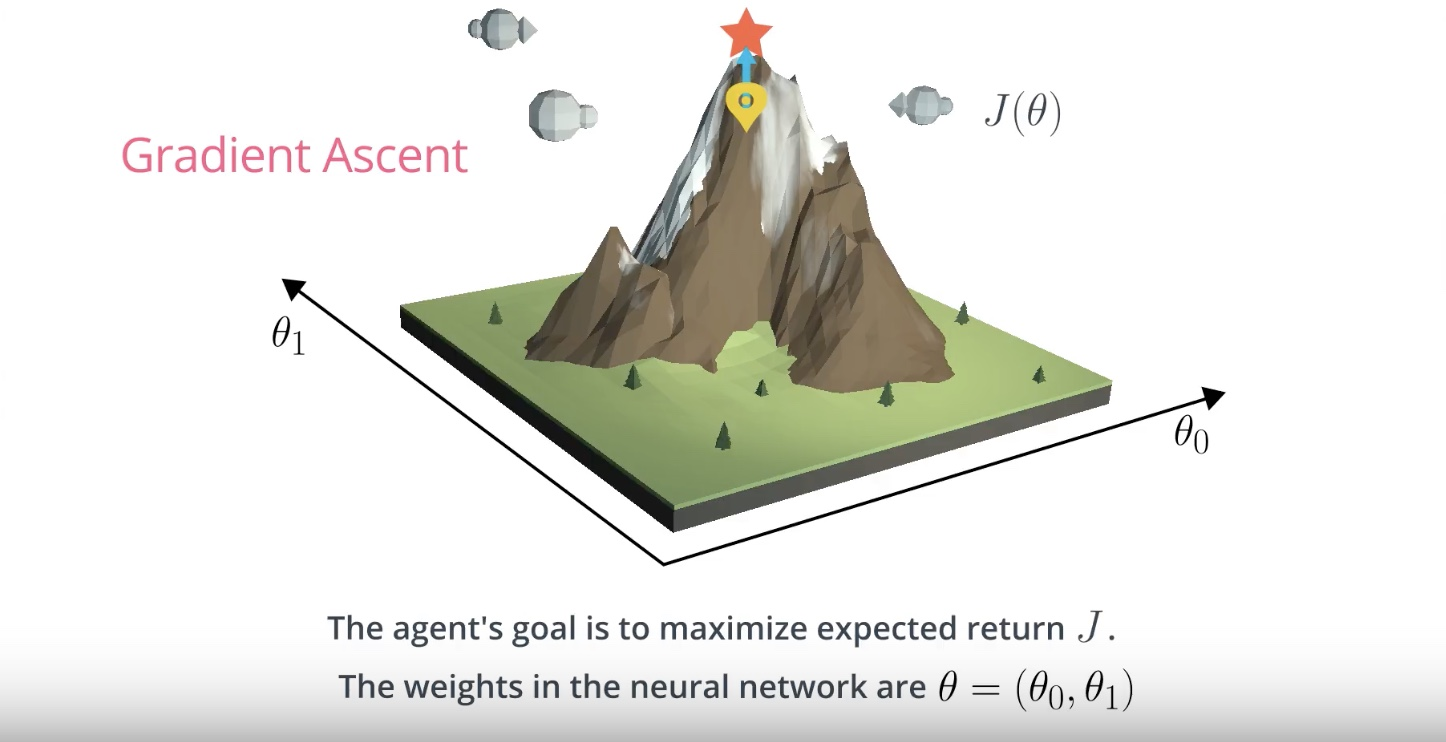

In [19]:
from IPython.display import Image
Image(filename='./images/3-1-4-4_hill_climbiing_reach_maximum_value_of_function.jpeg')

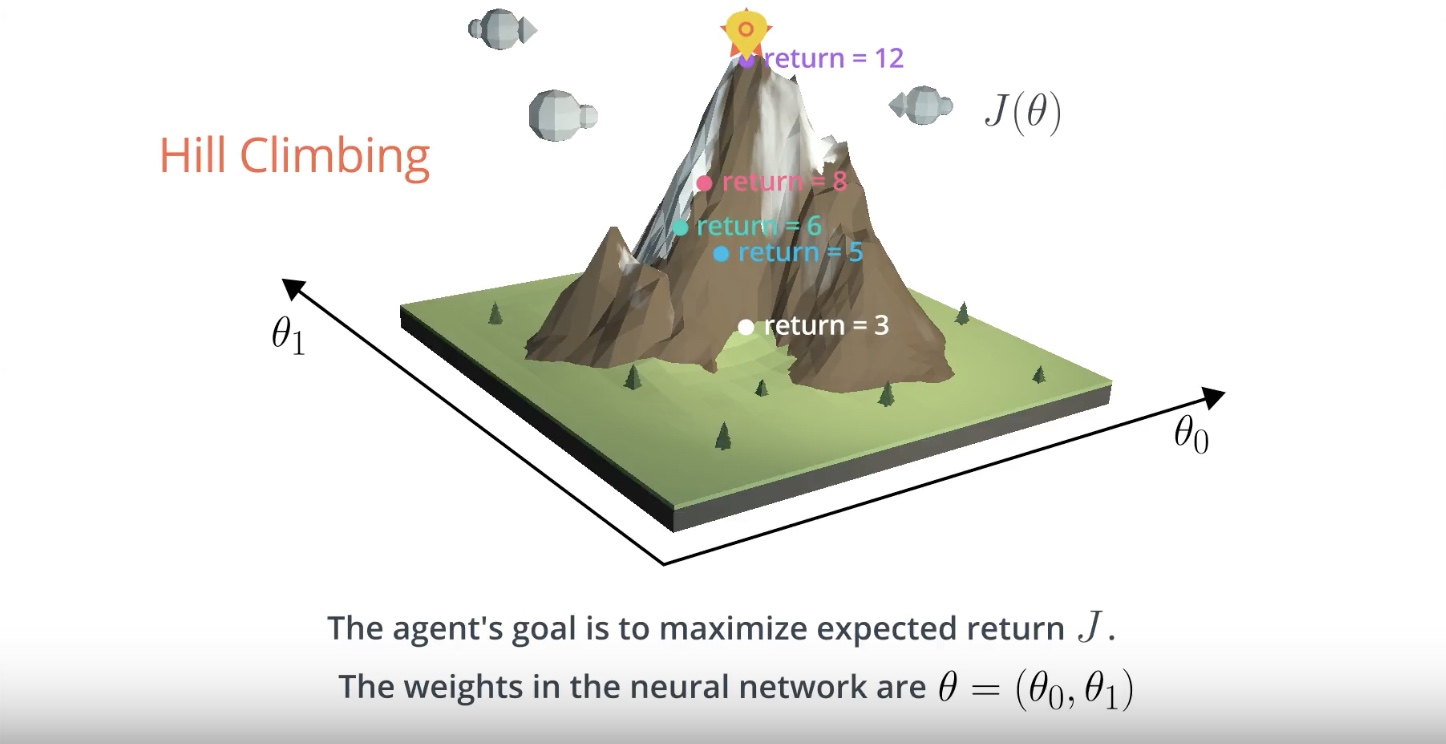

In [20]:
from IPython.display import Image
Image(filename='./images/3-1-4-5_hill_climbiing_reach_optimal_value.jpeg')

## Local Minima

### * hill climbing is a relatively simple algorithm that the agent can use to gradually improve the weights θ in its policy network while interacting with the environment.
### * hill climbing is not guaranteed to always yield the weights of the optimal policy. This is because we can easily get stuck in a local maximum.

## 3-1-5 : Hill Climbing Pseudocode

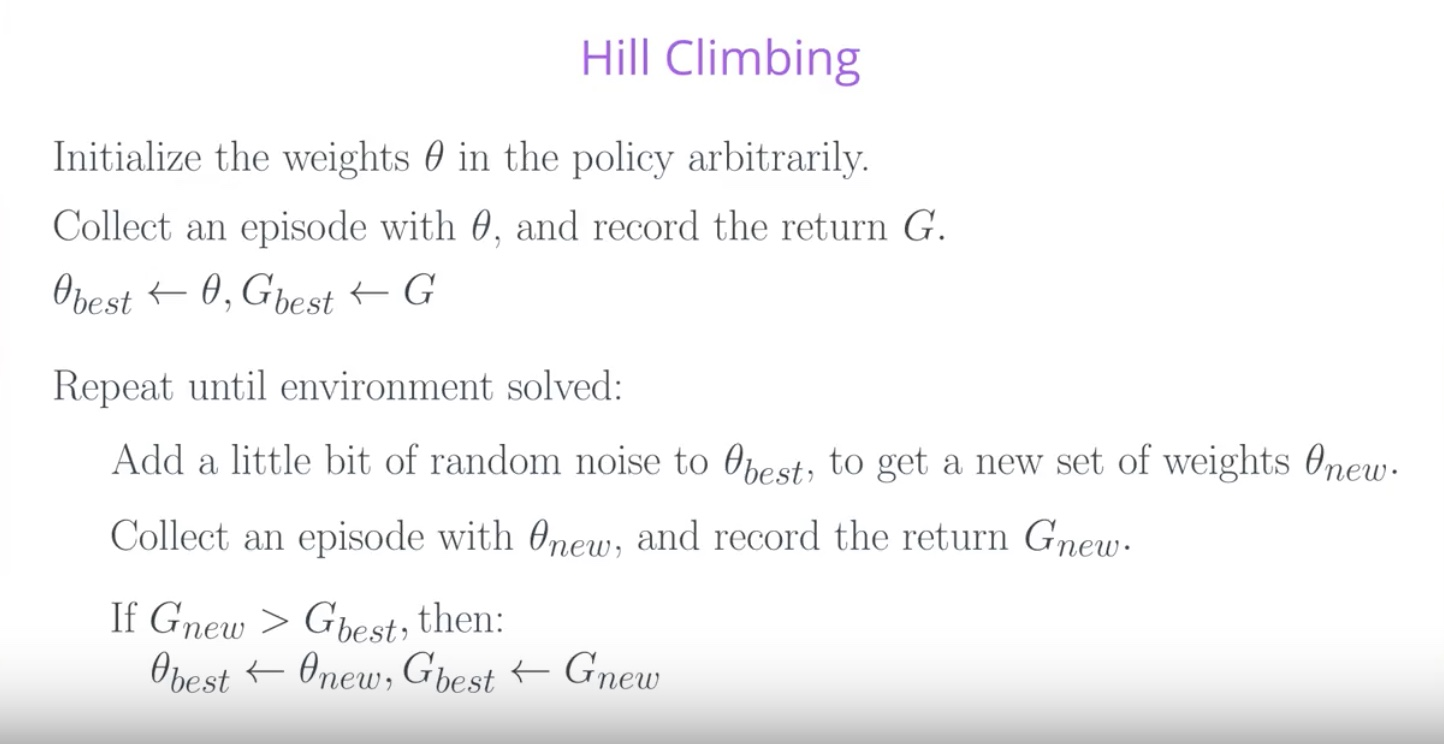

In [21]:
from IPython.display import Image
Image(filename='./images/3-1-5-1_hill_climbiing_pseudocode.jpeg')

## G vs. J (What's the difference?)

#### The agent collects in a single episode (G from the pseudocode above) and the expected return J.
#### In reinforcement learning, the goal of the agent is to find the value of the policy network weights θ that maximizes [expected] return, which we have denoted by J.
### In the hill climbing algorithm, the values of θ are evaluated according to how much return G they collected in a [single episode]
## Due to randomness in the environment (and the policy, if it is stochastic), it is highly likely that if we collect a second episode with the same values for θ, we'll likely get a different value for the return G.
# Because of this, the (sampled) return G is not a perfect estimate for the expected return J, but it often turns out to be [good enough] in practic





## 3-1-6 : Beyond Hill Climbing

* We refer to the general class of approaches that find  argmax J(θ) through randomly perturbing the most recent best estimate as [stochastic policy search]. 
* Likewise, we can refer to J as an [objective function], which just refers to the fact that we'd like to maximize it.


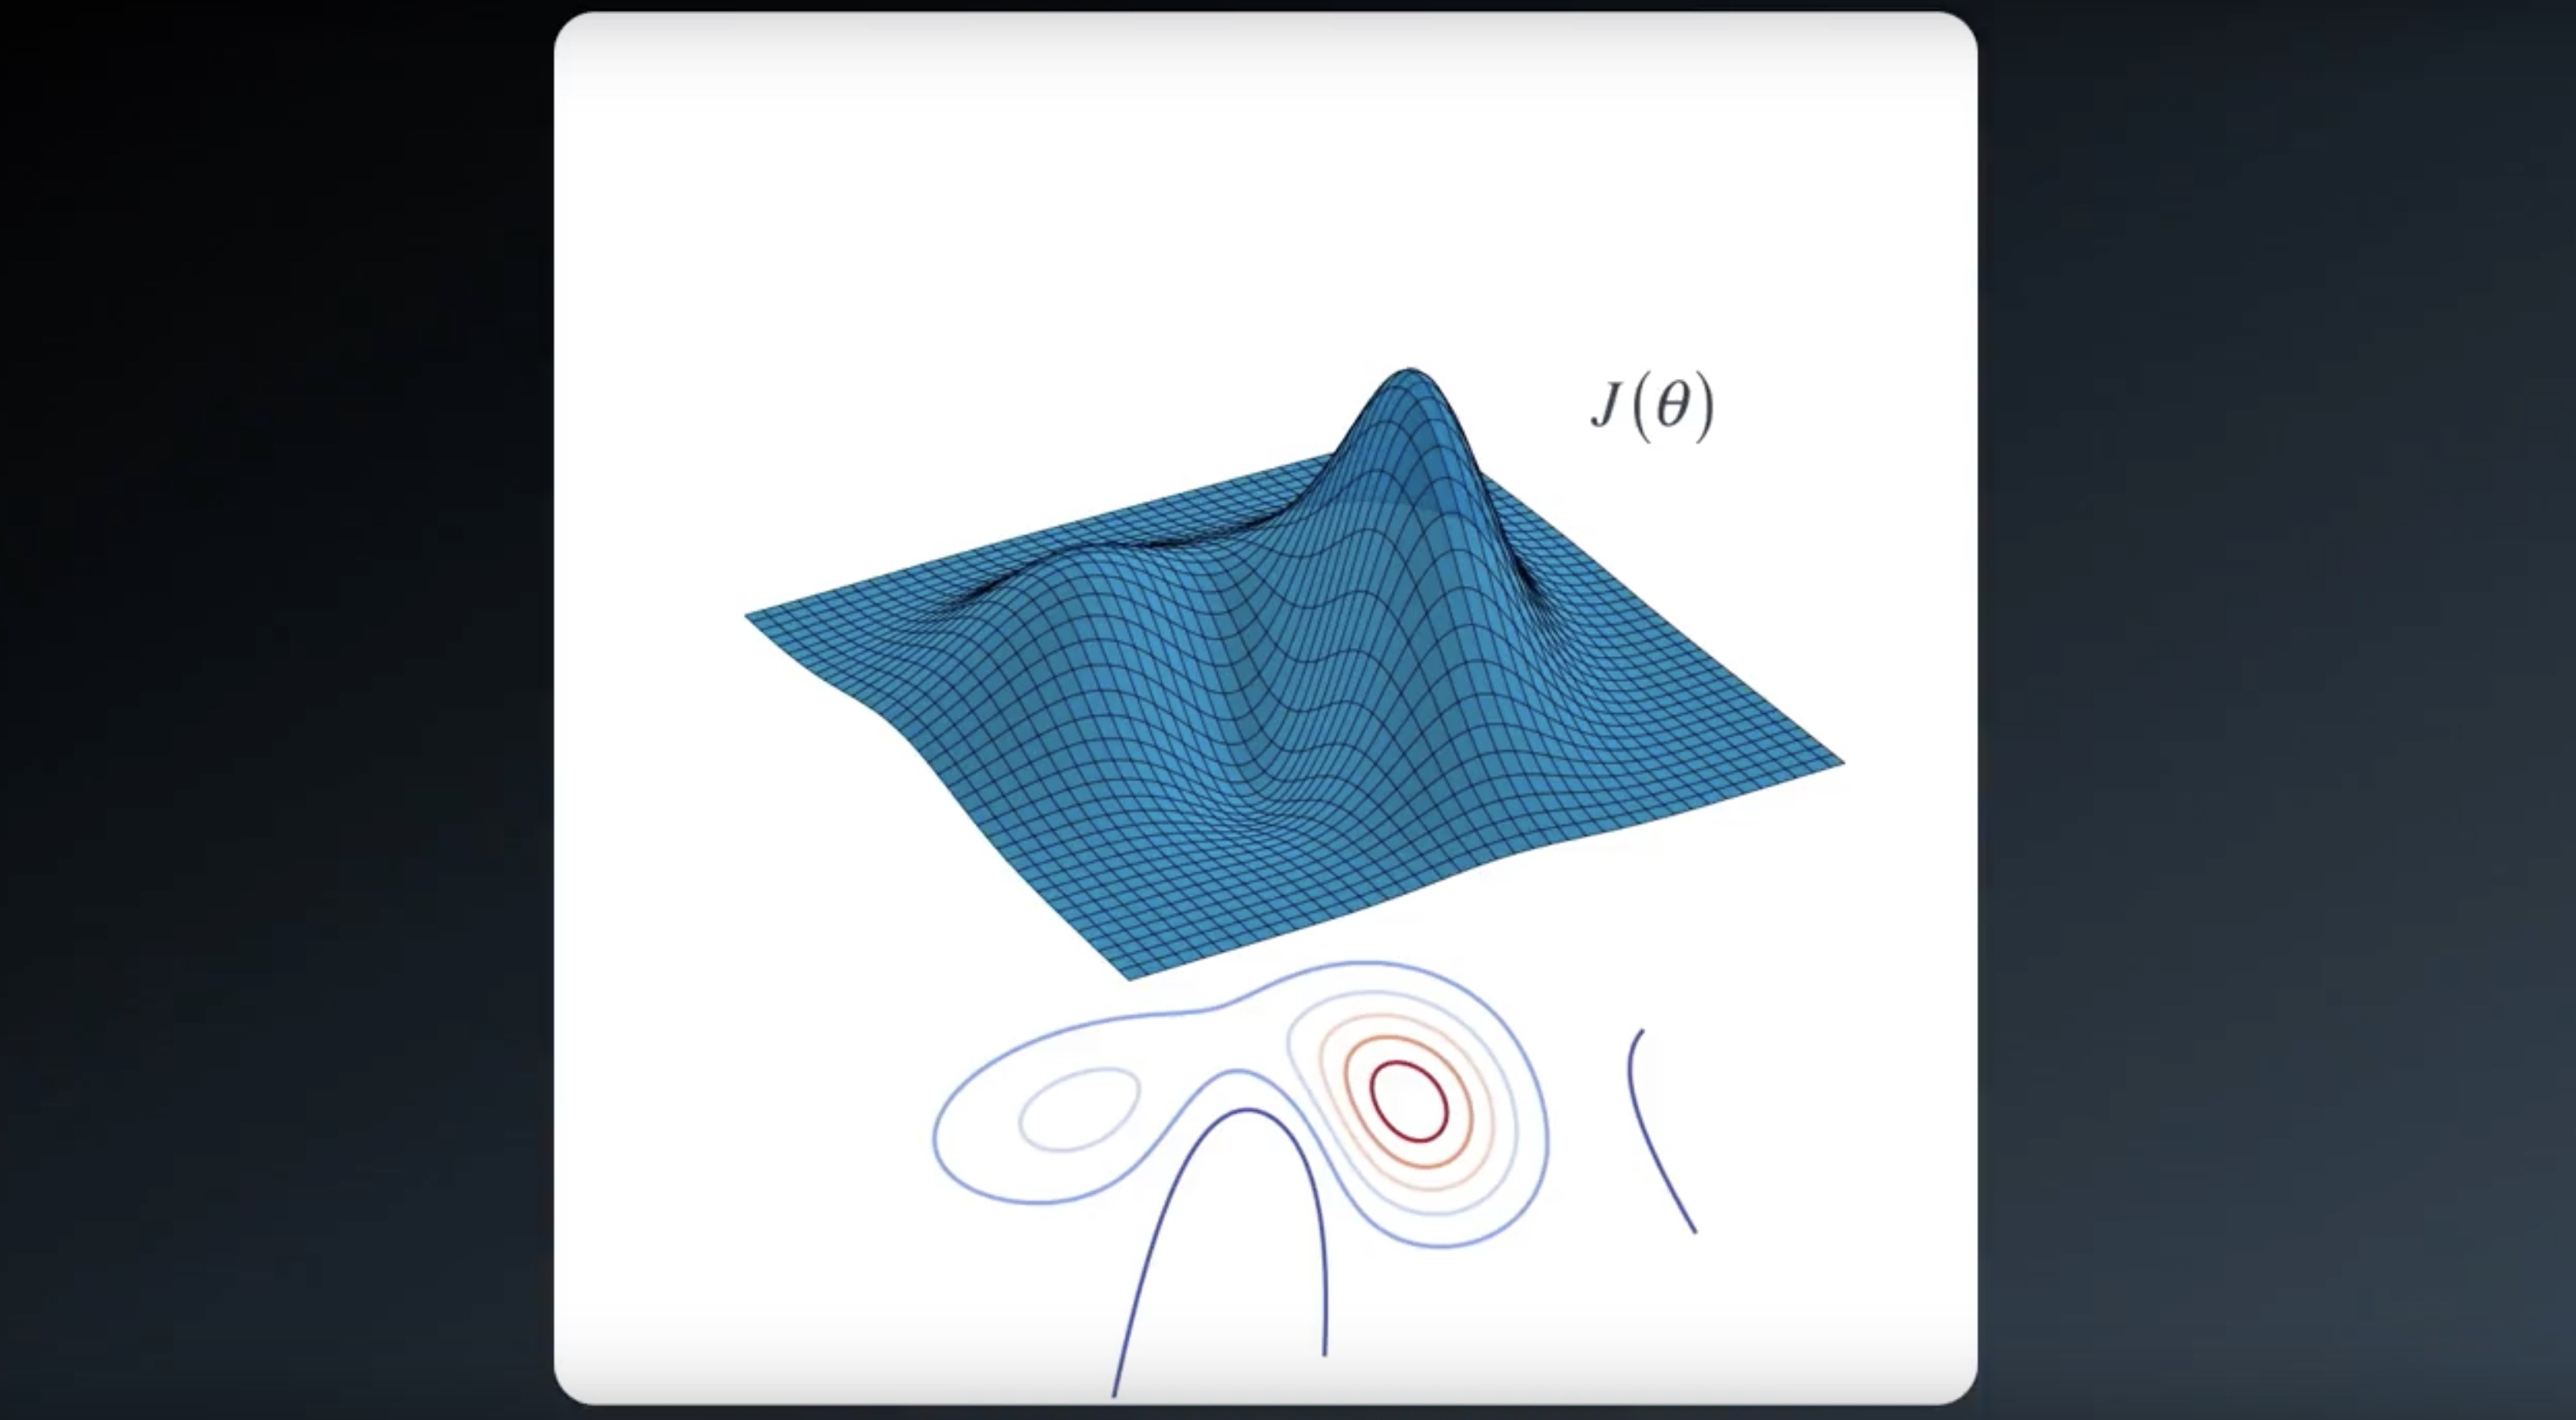

In [22]:
from IPython.display import Image
Image(filename='./images/3-1-6-1_hill_climbiing_we_dont_know_j.jpeg')

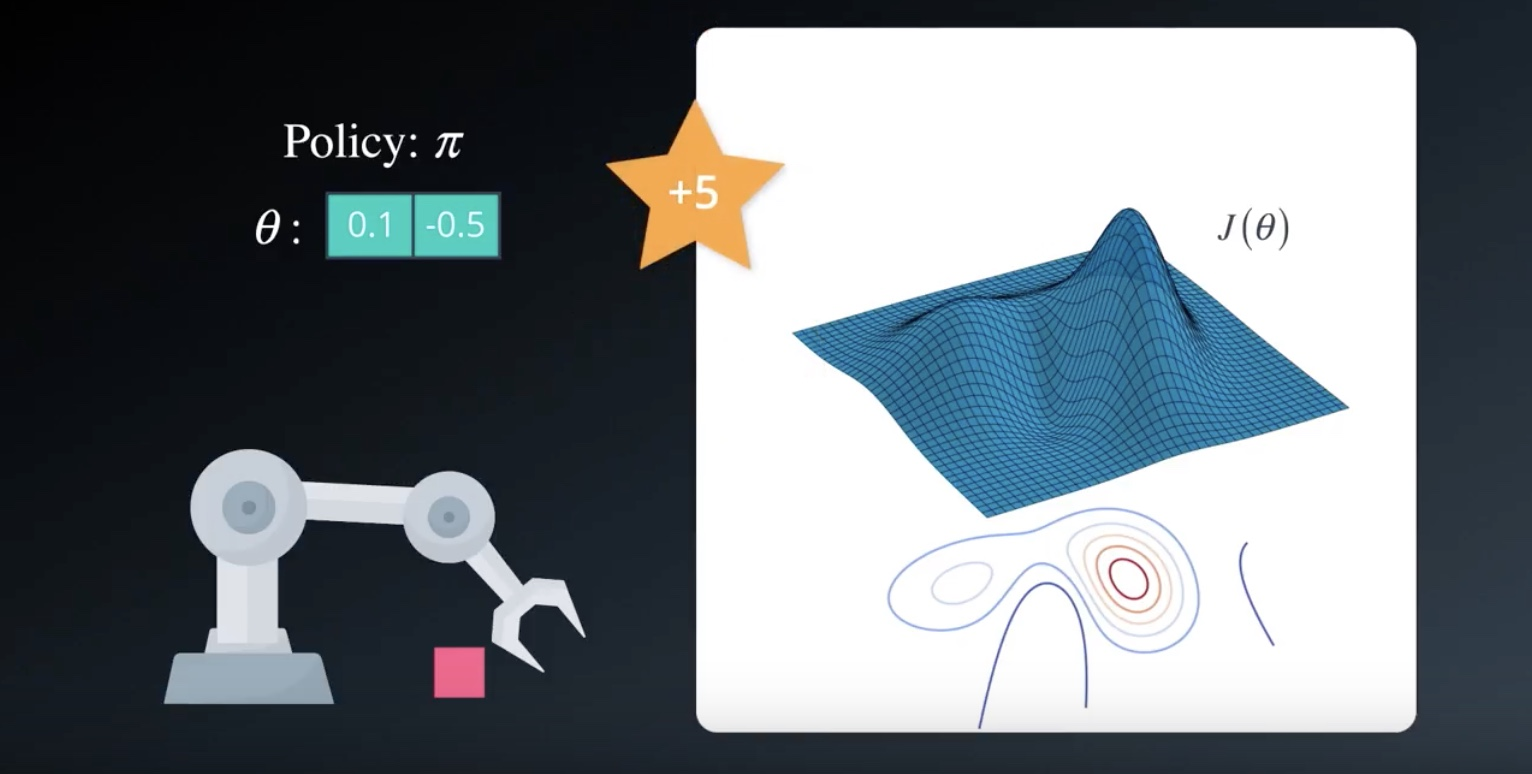

In [23]:
from IPython.display import Image
Image(filename='./images/3-1-6-2_hill_climbiing_with_sochastic_policy_search_returns_objective_value.jpeg')

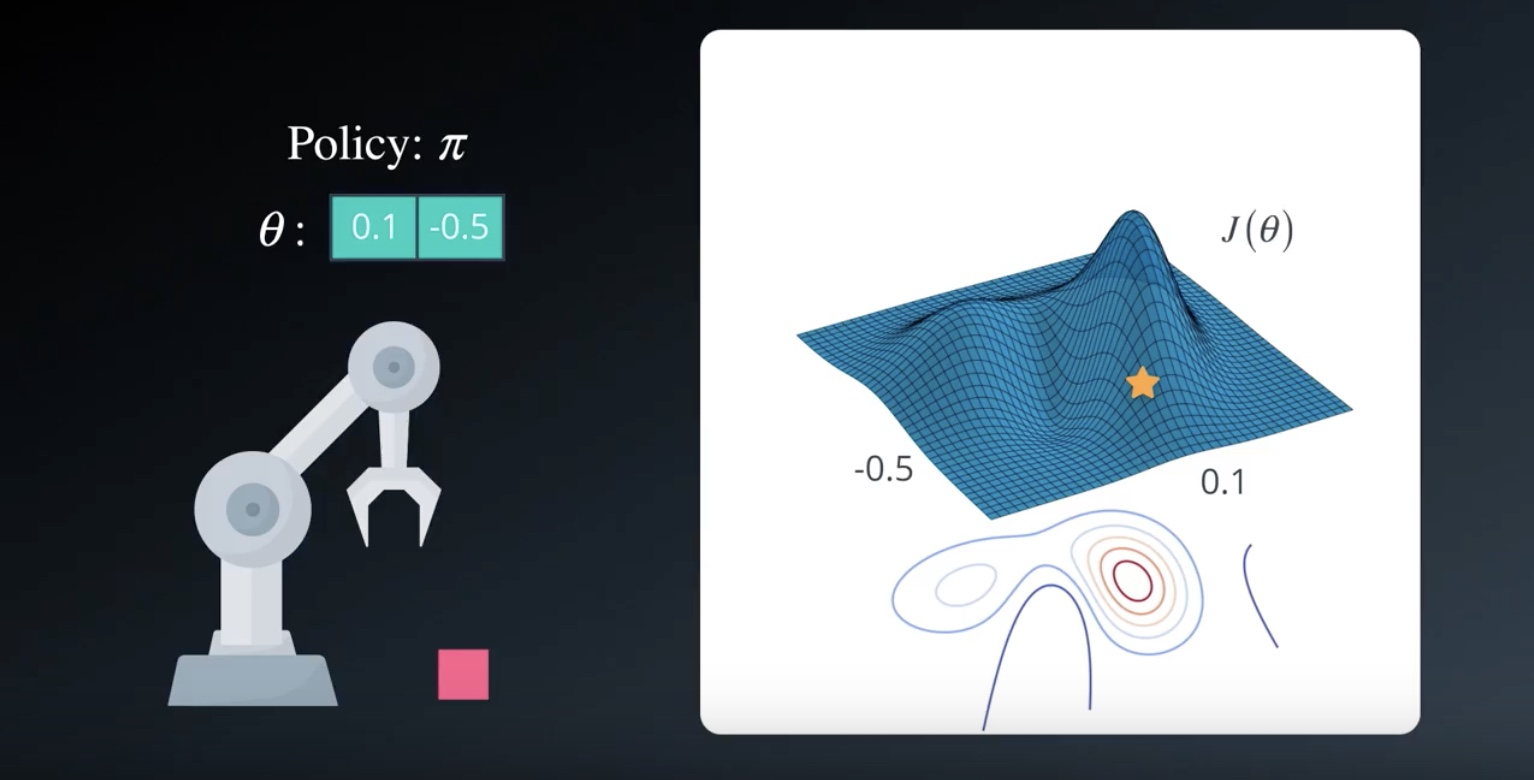

In [24]:
from IPython.display import Image
Image(filename='./images/3-1-6-3_hill_climbiing_policy_is_somewhere_on_the_objective_function_surface.jpeg')

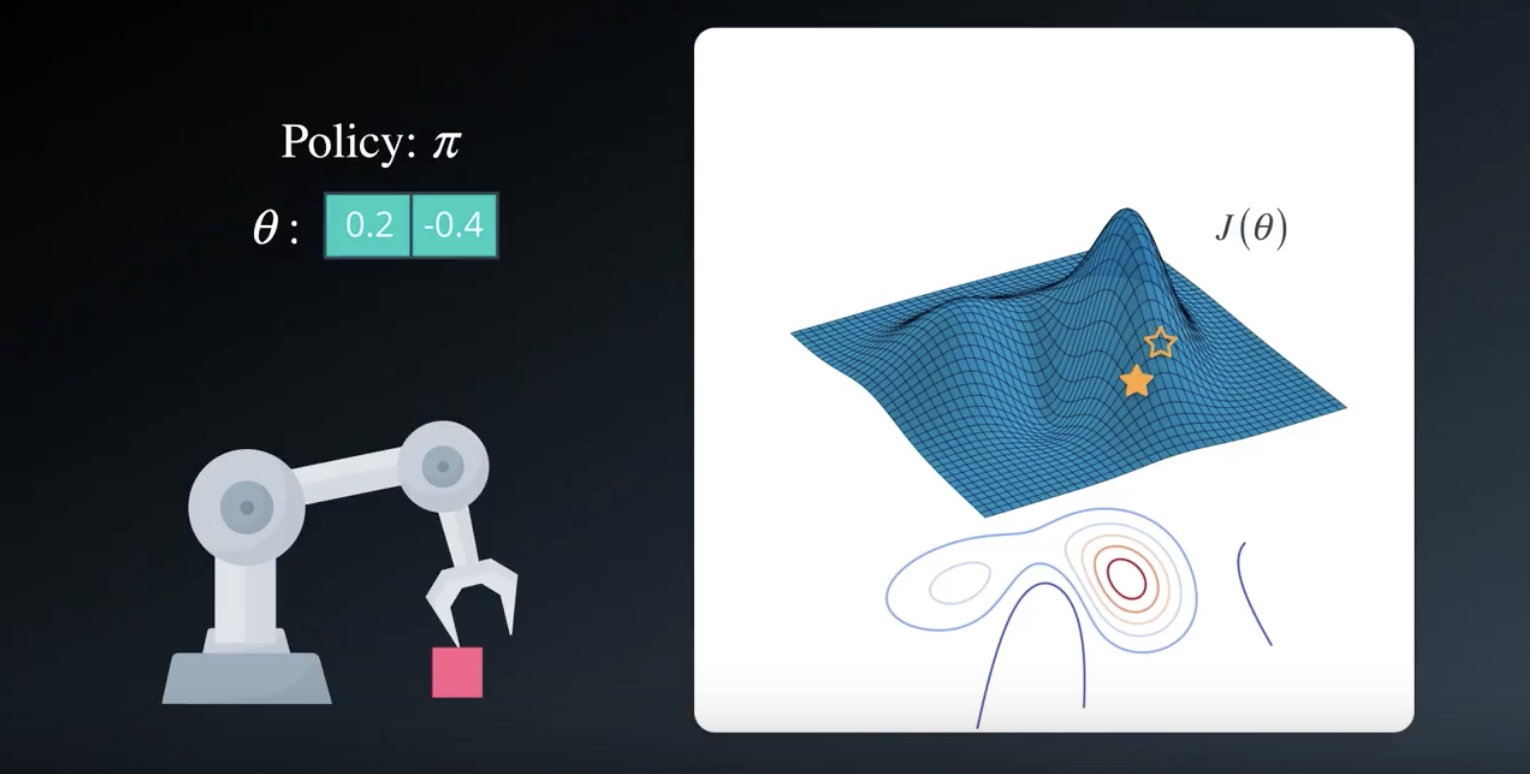

In [25]:
from IPython.display import Image
Image(filename='./images/3-1-6-4_hill_climbiing_change_parameters_by_adding_gaussian_noise.jpeg')

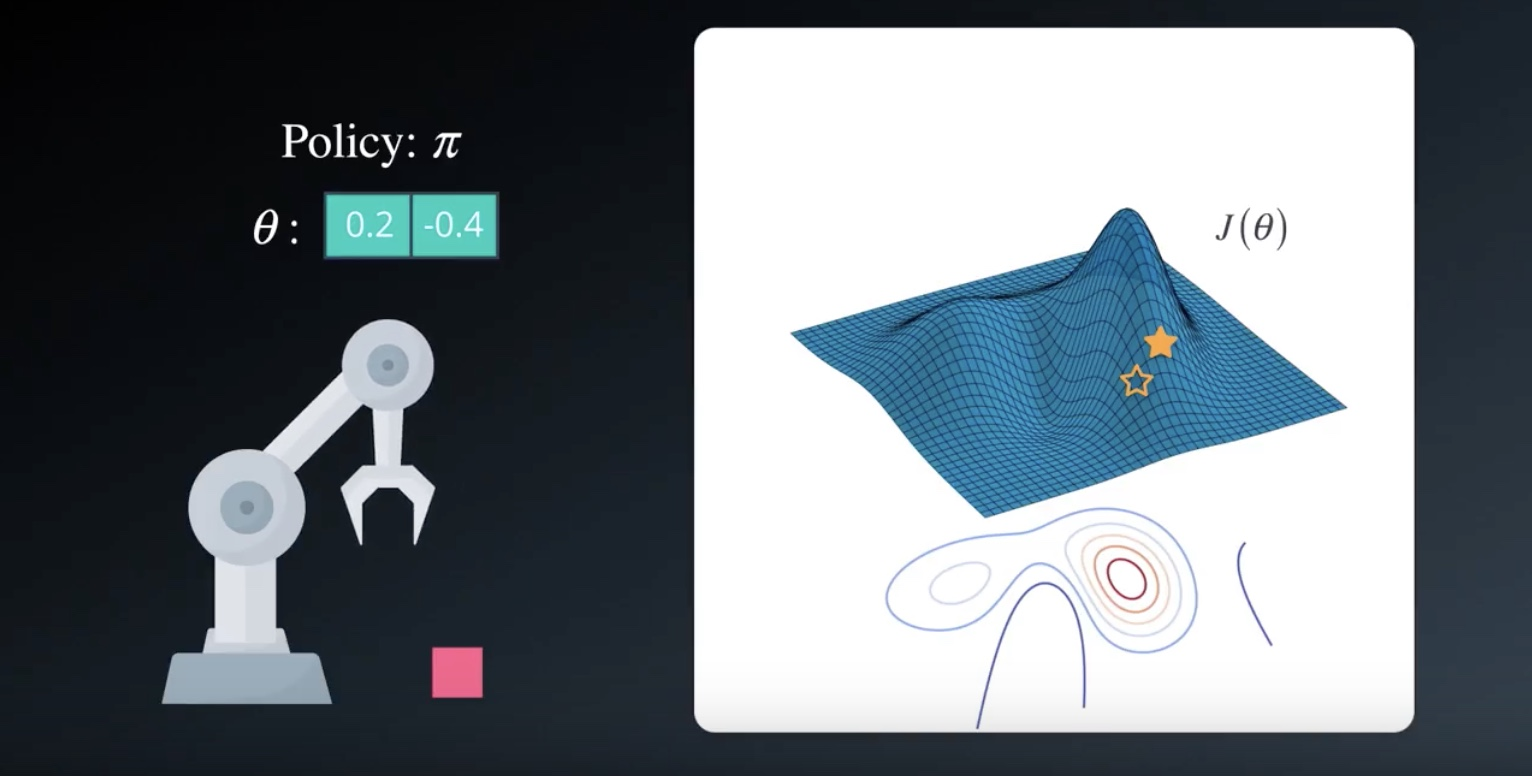

In [26]:
from IPython.display import Image
Image(filename='./images/3-1-6-5_hill_climbiing_set_this_policy_to_new_best_policy.jpeg')

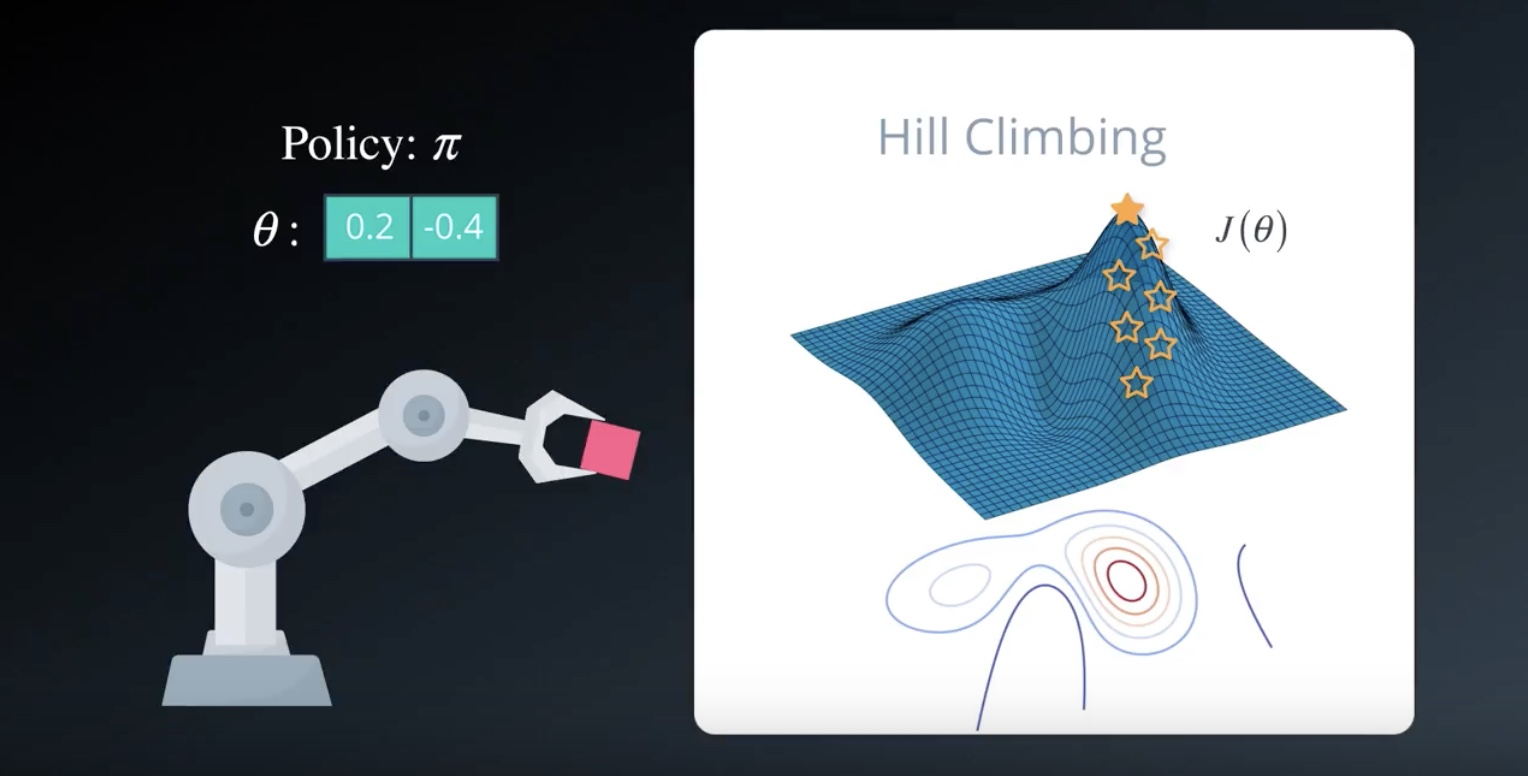

In [27]:
from IPython.display import Image
Image(filename='./images/3-1-6-6_hill_climbiing_iterate_until_top_of_the_hill.jpeg')

## The best part of 'Hill Climbing' is that "You can use any policy function".
## It doesn't need to be differentiable or even continuous.

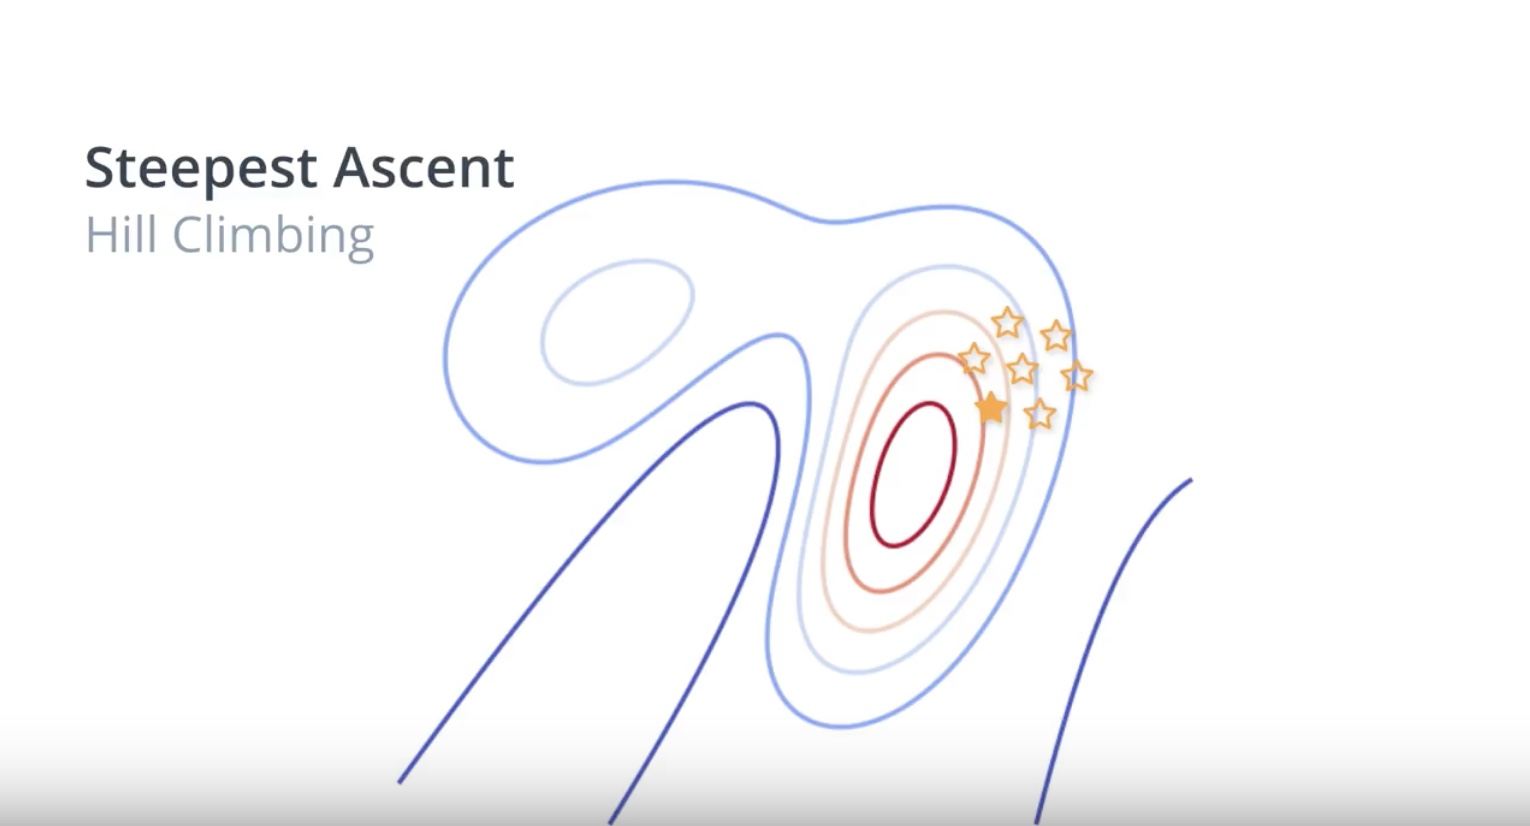

In [28]:
from IPython.display import Image
Image(filename='./images/3-1-6-7_beyond_hill_climbiing_steepest_ascent.jpeg')

## Stepest Ascent

* It generates several neighboring policies at each iteration.
* It helps reduce the risk of selecting a next policy that may lead to a suboptimal solution. 
* You could still get stuck in local optima.

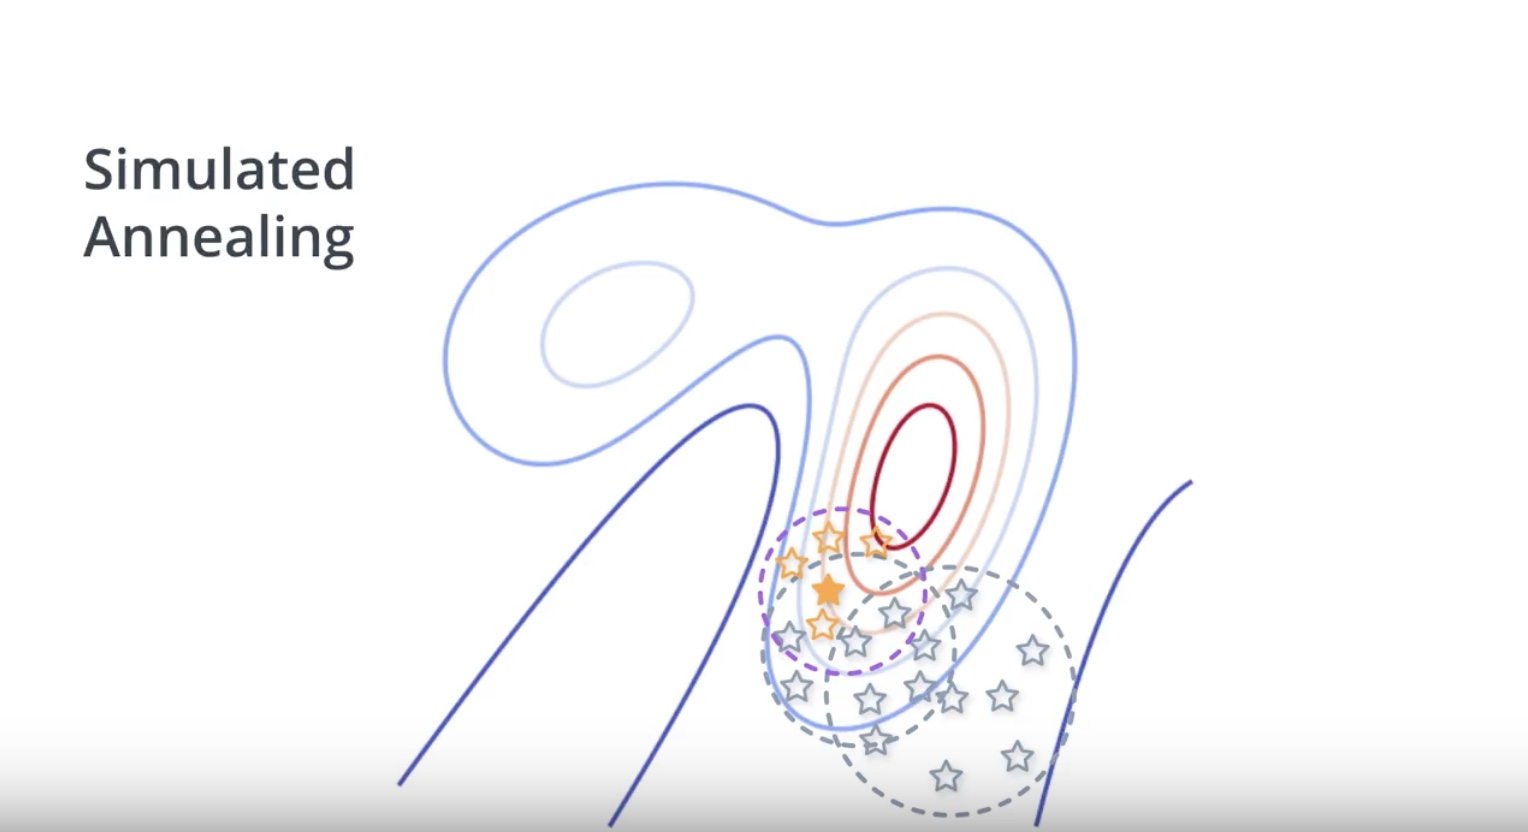

In [29]:
from IPython.display import Image
Image(filename='./images/3-1-6-8_beyond_hill_climbiing_simulated_annealing.jpeg')

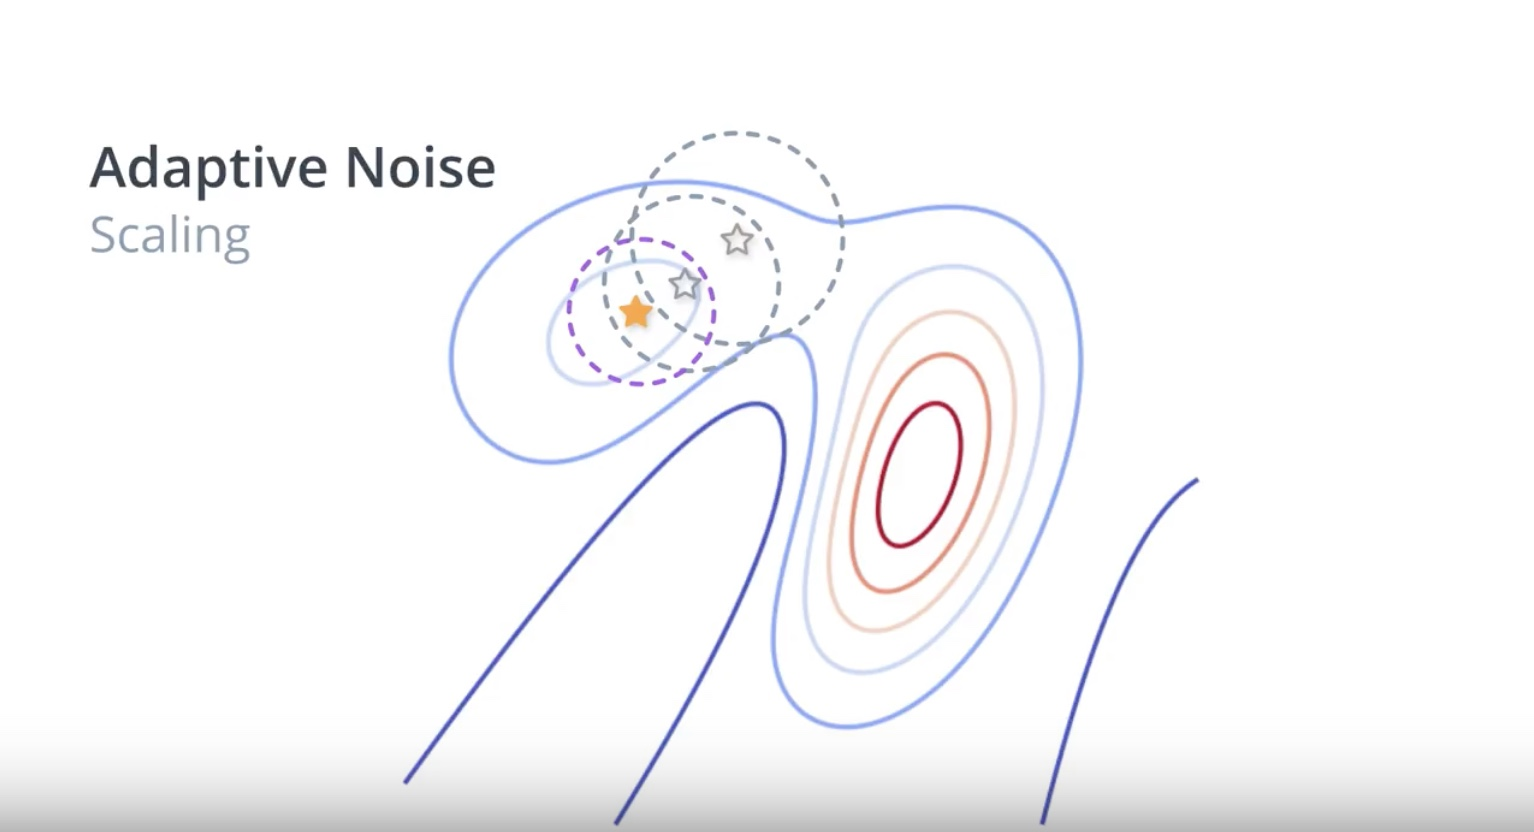

In [30]:
from IPython.display import Image
Image(filename='./images/3-1-6-9_beyond_hill_climbiing_adaptive_noise_same_as_sa.jpeg')

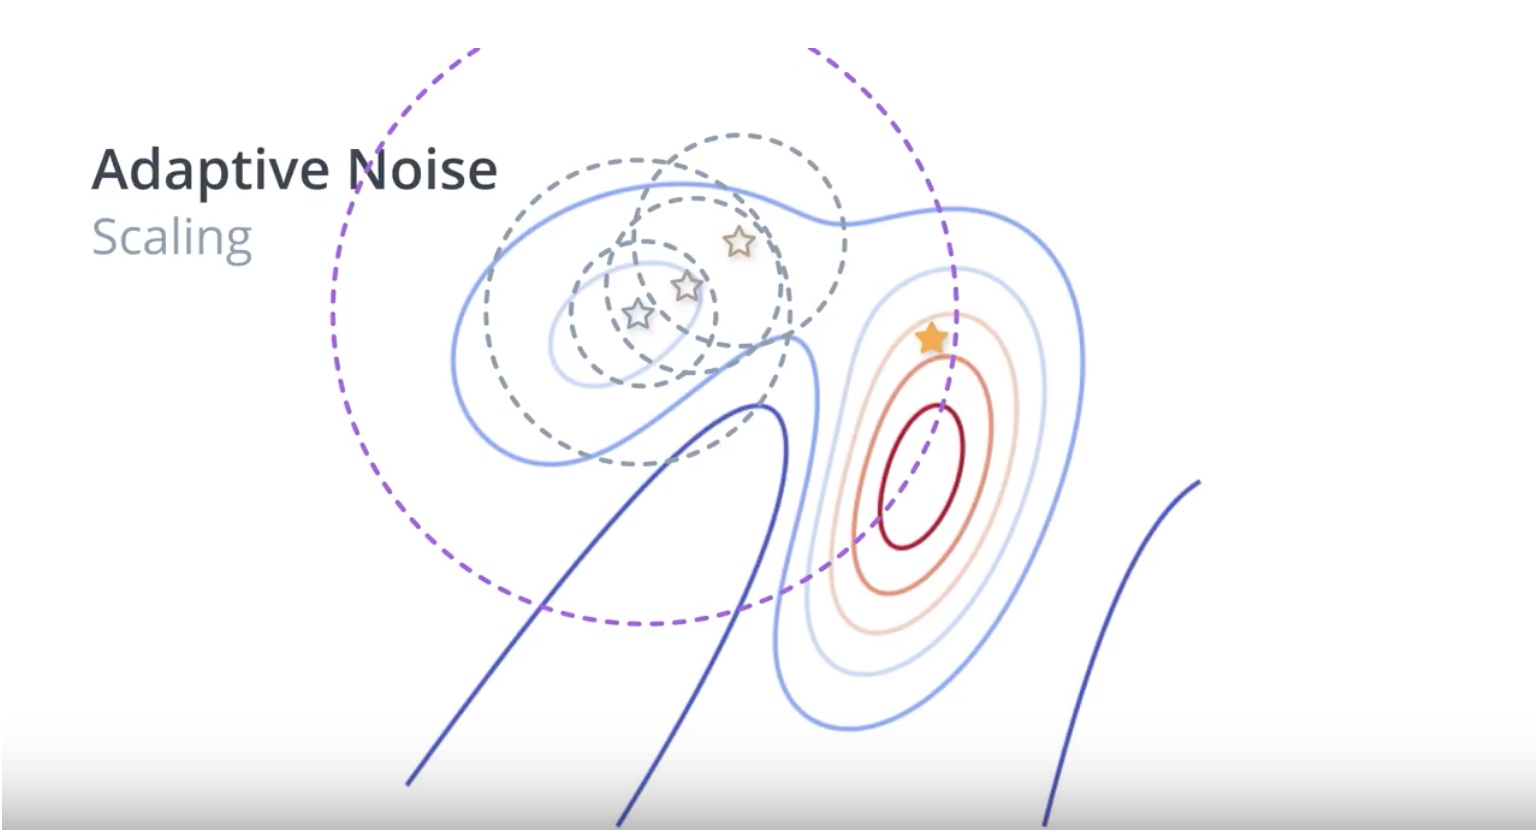

In [31]:
from IPython.display import Image
Image(filename='./images/3-1-6-10_beyond_hill_climbiing_adaptive_noise_extend_serach_radius_when_is_not_best.jpeg')

## 3-1-7 : More Black-Box Optimization

#### * Black-box refers to the fact that in order to find the value of θ that maximizes the function J=J(θ), we need only be able to estimate the value of J at any potential value of θ.
#### * Both hill climbing and steepest ascent hill climbing don't know that we're solving a reinforcement learning problem, and they do not care that the function we're trying to maximize corresponds to the expected return.
### * These algorithms only know that for each value of θ, there's a corresponding number. 
### * We know that this number corresponds to the return obtained by using the policy corresponding to θ to collect an episode, but the algorithms are not aware of this.
## To the algorithms, the way we evaluate θ is considered a black box, and they don't worry about the details.
## The algorithms only care about finding the value of θ that will maximize the number that comes out of the black box.

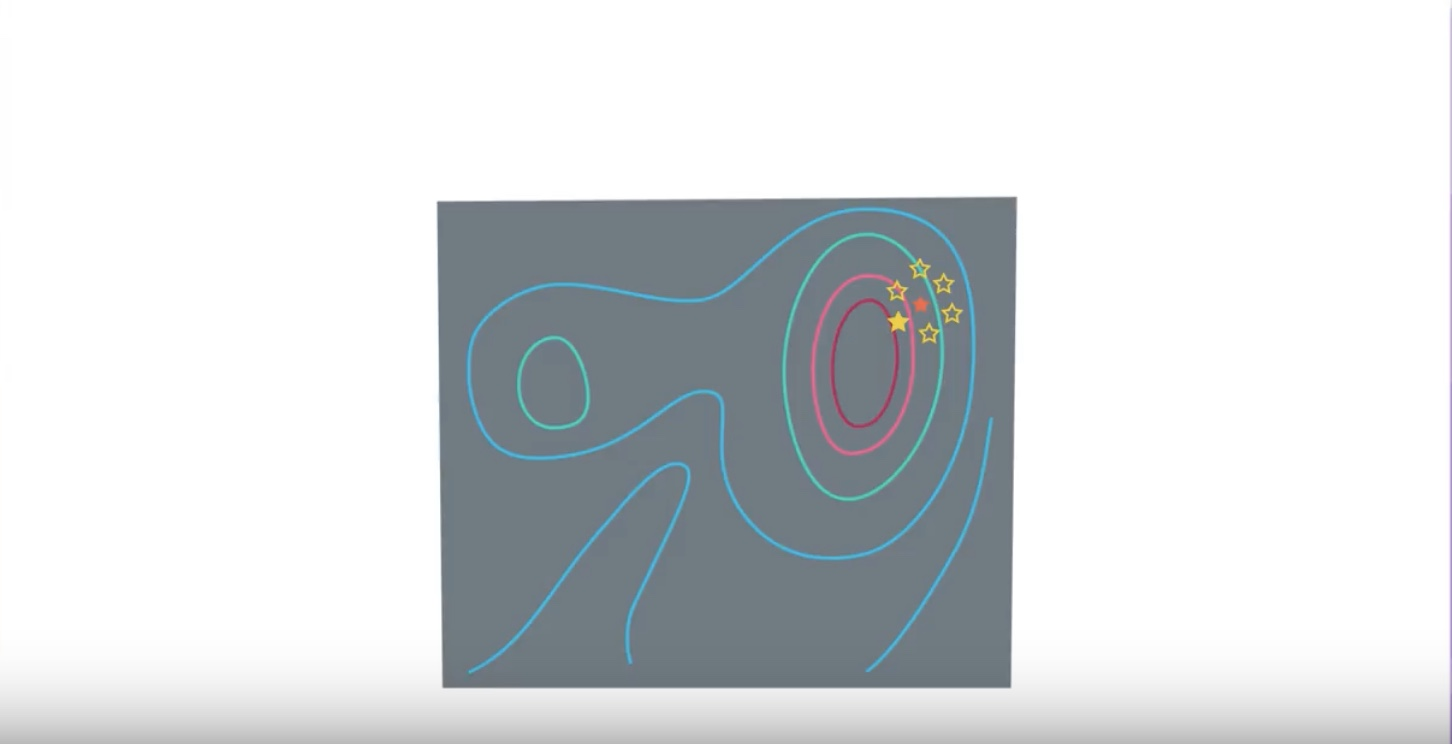

In [32]:
from IPython.display import Image
Image(filename='./images/3-1-7-1_steepest_ascent_dont_use_usuful_imformation_from_not_selected.jpeg')

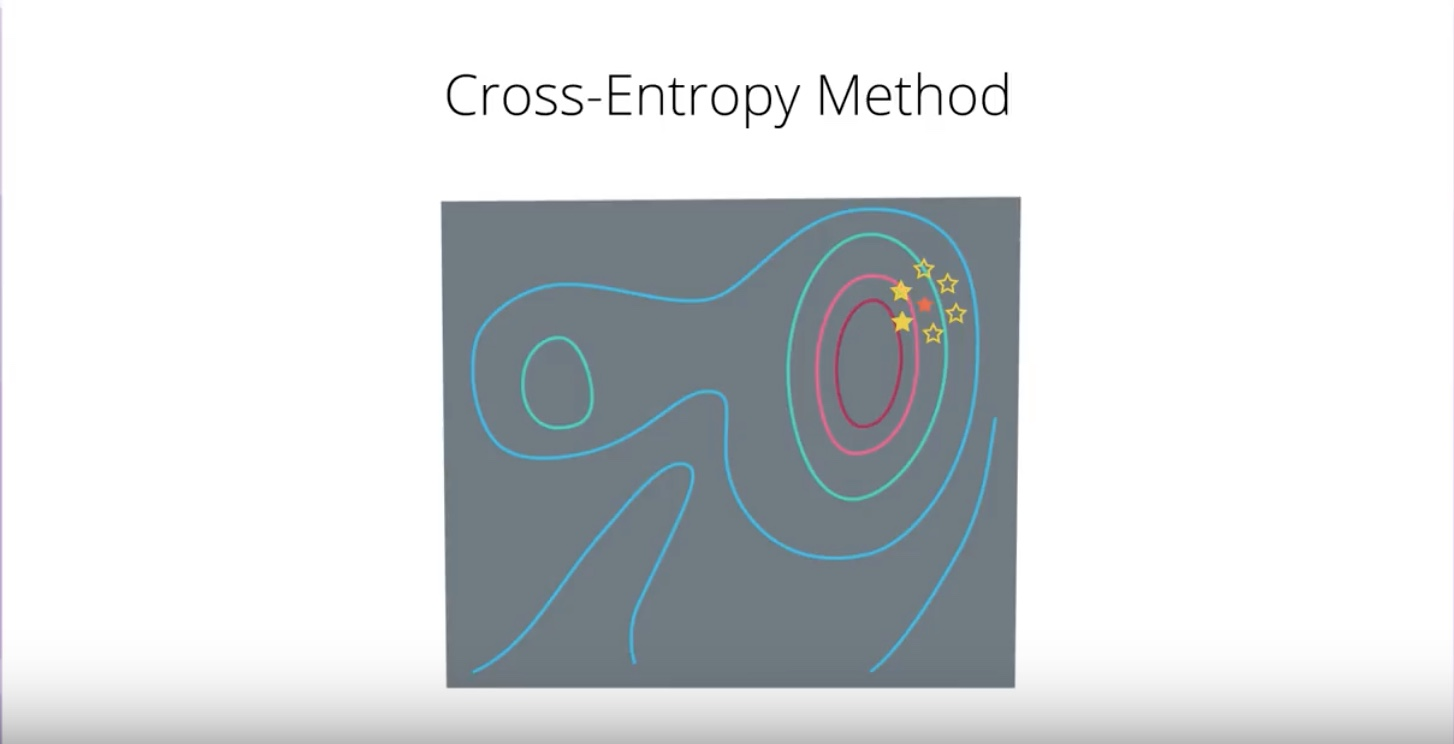

In [33]:
from IPython.display import Image
Image(filename='./images/3-1-7-2_cross_entropy_method_select_top_n_and_use_average_of_them.jpeg')

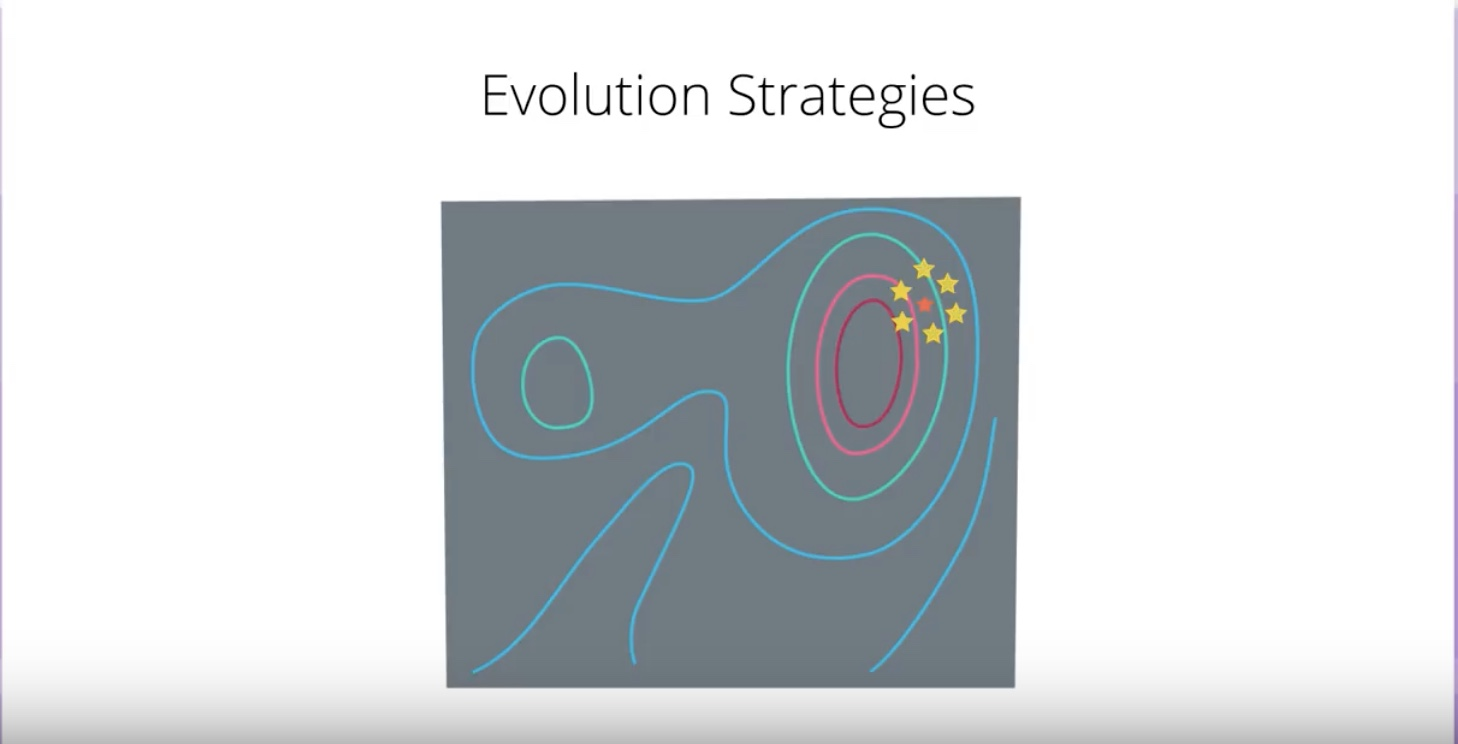

In [34]:
from IPython.display import Image
Image(filename='./images/3-1-7-3_evolution_strategies_the_best_policy_is_weighted_sum_of_all_selected.jpeg')

## 3-1-8 : Why Policy-Based Methods?

why do we need policy-based methods at all, when value-based methods work so well?